In [1]:
%matplotlib inline
import io, os, sys, types
!{sys.executable} -m pip install scrapy 
# Imports own outside scripts
import Databaseloader as dl
import loadinvizerfit as lif
import jsonwriter
import readandplotfits as rpf
import writereg as wr
import dbtools
import cutout as ct

########################################################<<<<<<<<<<<<<<<<
# THIS IS NEW ZACK
import jsondatabase as jsbase
#ASLO DATABASEANALYSER IS NEW BUT IT IS THE SCRAPPER 

#########################################<<<<<<<<<<<<<<<<<<<<<<<
#########################################
import json
import glob
import matplotlib
import loadjson as ljs
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import tkp.db
from astropy.coordinates import SkyCoord
from tkp.db.model import Varmetric
from tkp.db.model import Runningcatalog
from tkp.db.model import Newsource
from tkp.db.model import Extractedsource
from tkp.db.model import Image
import operator
from operator import itemgetter, attrgetter

import logging
import pandas as pd
from pandas import DataFrame
import sqlalchemy
from sqlalchemy import *
from sqlalchemy.orm import relationship
#import Tools
#import generic_tools
#import plotting_tools
from scipy.stats import norm
import pylab
pylab.rcParams['legend.loc'] = 'best'
from matplotlib.ticker import NullFormatter
from matplotlib.font_manager import FontProperties
#from astroML import density_estimation

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import fcluster
from scipy.spatial import distance
import scipy.stats as ss
import scipy.optimize as op
import scipy.integrate as si
!{sys.executable} -m pip install numpy

# !{sys.executable} -m pip install bokeh
# from bokeh.plotting import figure, output_notebook, show
# from bokeh.models import DatetimeTickFormatter
# from bokeh.models import ColumnDataSource, Whisker
# from bokeh.io import export_png
# output_notebook()
matplotlib.rcParams.update({'errorbar.capsize': 2})
logging.basicConfig(level=logging.INFO)

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
You should consider upgrading via the 'pip install --upgrade pip' command.
DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
engine = 'postgresql'
host = 'vlo.science.uva.nl'
port = 5432 
user = 'zmeyers'
password = '5EmXFidPKclW'
database='DDbatch2'


websiteURL = 'http://banana.transientskp.org/r4/vlo_'+database+'/runningcatalog/'
latexURL = '\url{http://banana.transientskp.org/r4/vlo_'+database+'/runningcatalog/'
latexHREF = '\href{http://banana.transientskp.org/r4/vlo_'+database+'/runningcatalog/'
query_loglevel = logging.WARNING  # Set to INFO to see queries, otherwise WARNING


In [3]:
# this is sqlalchemy script to login to the Banana database
logging.getLogger('sqlalchemy.engine').setLevel(query_loglevel)
db = tkp.db.Database(engine=engine, host=host, port=port,
                     user=user, password=password, database=database)
db.connect()
session = db.Session()

# Here i get the peak flux and the error on the peak flux from all the sources in the database
fpeak = session.query(Extractedsource.f_peak).all()
fpeake = session.query(Extractedsource.f_peak_err).all()
typesextract = session.query(Extractedsource.fit_type).all()
# arParams = session.query(Varmetric,Runningcatalog).select_from(join(Varmetric,Runningcatalog)).filter(Runningcatalog.dataset_id == dataset_id).all()
califreq = np.load("freqlist.npy")
califlux = np.load("fluxlist.npy")


INFO:tkp.db.database:Database config: postgresql://zmeyers@vlo.science.uva.nl:5432/DDbatch2
INFO:tkp.db.database:connecting to database...
INFO:tkp.db.database:connected to: postgresql://zmeyers@vlo.science.uva.nl:5432/DDbatch2


In [4]:
# Here I specifiy which dataset of the database to use
dataset_id = 33
timescale = "P20_eight"
technique = database
savefigs = True
# runcat_id = 16077

# VarParams = session.query(Varmetric,Runningcatalog).select_from(join(Varmetric,Runningcatalog)).filter(Runningcatalog.dataset_id == dataset_id).all()
# imagecontrol = session.query(Runningcatalog,Image).filter(Runningcatalog.dataset_id == dataset_id).all()
session = dbtools.access(engine,host,port,user,password,database)
tables = ['image','varmetric','newsource']
PandasParams = dbtools.GetPandaExtracted(session,dataset_id,tables)

INFO:tkp.db.database:connecting to database...
INFO:tkp.db.database:connected to: postgresql://zmeyers@vlo.science.uva.nl:5432/DDbatch2


connected!


In [5]:
imagenonsense = session.query(Image).filter(Image.dataset_id == dataset_id)
imagenonsense.all()[1].skyrgn.centre_ra
# centre_decl
for i in imagenonsense.all():
    if i.id == 41756:
        print i.skyrgn.centre_ra
        print i.skyrgn.centre_decl
# imagenonsense.all()[1].id

210.684416667
52.4194108333


In [6]:
dir(imagenonsense.all()[1])

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__mapper__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__table__',
 '__tablename__',
 '__weakref__',
 '_decl_class_registry',
 '_sa_class_manager',
 '_sa_instance_state',
 'analysis_thresh',
 'band',
 'band_id',
 'dataset',
 'dataset_id',
 'deltax',
 'deltay',
 'detection_thresh',
 'extractedsources',
 'fits_data',
 'fits_header',
 'fov_degrees',
 'freq_bw',
 'freq_eff',
 'fwhm_arcsec',
 'id',
 'metadata',
 'node',
 'nodes',
 'rb_pa',
 'rb_smaj',
 'rb_smin',
 'rms_max',
 'rms_min',
 'rms_qc',
 'skyrgn',
 'skyrgn_id',
 'stokes',
 'tau',
 'tau_time',
 'taustart_ts',
 'url']

Left off here <a name='bookmark' />

Go to <a href=#bookmark2>my bookmark</a>

Query to find the variability parameters of the sources in a specific dataset 

In [7]:
# print len(VarParams)
# print len(imagecontrol)
# for i in imagecontrol:
#     print i
print PandasParams.keys()
newPandas = PandasParams.drop_duplicates(subset='xtrsrc')


Index([               u'xtrsrc',               u'dataset',
                      u'runcat',            u'datapoints',
                        u'zone',                 u'wm_ra',
                     u'wm_decl',     u'wm_uncertainty_ew',
           u'wm_uncertainty_ns',            u'avg_ra_err',
                u'avg_decl_err',               u'avg_wra',
                   u'avg_wdecl',         u'avg_weight_ra',
             u'avg_weight_decl',                     u'x',
                           u'y',                     u'z',
                    u'inactive',               u'mon_src',
            u'forcedfits_count',                  u'band',
                      u'skyrgn',                 u'image',
                         u'tau',                u'stokes',
                    u'tau_time',              u'freq_eff',
                     u'freq_bw',           u'taustart_ts',
                     u'rb_smaj',               u'rb_smin',
                       u'rb_pa',                u'deltax

Make 2d array of all the sources except for the transients.

In [8]:
# plotdata = [[VarParams[i].Runningcatalog.id, VarParams[i].Runningcatalog.wm_ra,\
#              VarParams[i].Runningcatalog.wm_decl,VarParams[i].Runningcatalog.avg_ra_err,\
#              VarParams[i].Runningcatalog.avg_decl_err, VarParams[i].Runningcatalog.datapoints,\
#              session.query(Newsource).filter(Newsource.id==VarParams[i].Varmetric.newsource).one().newsource_type,\
#              VarParams[i].Varmetric.newsource,VarParams[i].Varmetric.lightcurve_max,
#              session.query(Newsource).filter(Newsource.id==VarParams[i].Varmetric.newsource).one().trigger_xtrsrc.id,VarParams[i].Varmetric.eta_int]\
#             for i in range(len(VarParams)) if VarParams[i].Varmetric.newsource != None]
# for i in plotdata:
#     if i[0] ==2877:
#         print i
# newPandas = PandasParams
# print newPandas['lightcurve_median']
# print PandasParams
# print len(newPandas)
# # for i in newPandas['url']:
# #     print i
# print PandasParams['fit_type']
# print PandasParams['runcat']
# print PandasParams['fit_type']
# for i in range(len(PandasParams['runcat'])):
# #     print PandasParams['runcat'][i]
#     if PandasParams['runcat'][i] == 5774:
#         print 'hoi'
#         print PandasParams['fit_type'][i]
# #         if PandasParams['fit_type'][i]==0:
# #             print PandasParams['url'][i]


In [9]:
plotdata = [[i.runcat, i.wm_ra,\
             i.wm_decl,i.avg_ra_err,\
             i.avg_decl_err, i.datapoints,\
             i.newsource_type,\
             i.newsource,i.lightcurve_max,
             i.xtrsrc,i.eta_int,i.url]\
            for index,i in newPandas.iterrows() if i.newsource != None]
for i in imagenonsense.all():
    if i.id == newPandas.image.iloc[0]:
        centrera = i.skyrgn.centre_ra
        centredecl = i.skyrgn.centre_decl

In [10]:
print centrera
print centredecl
# for i in plotdata:
#     if i[7] ==5229:
# #         print i[9]-1
# #         print i
        
# #         print fpeak[i[9]-1][0]


210.684416667
52.4194108333


In [11]:
# The de Ruiter distance as shown in the Trap Paper section 4.4 https://arxiv.org/abs/1503.01526 

def CalcDeRuiter(transient,ra2,ra2e,dec2,dec2e):

    ra1 = transient['ra']
    dec1 = transient['dec']
    ra1e = transient['rae']
    dec1e = transient['dece']


    r=(np.sqrt((((-1*ra2 +ra1)**2)*(np.cos((dec1+dec2)/2))**2)/\
                       (ra1e**2+ra2e**2)+((-1*dec2+dec1)**2/(dec1e**2+dec2e**2))))
    return r 

In [12]:
# Comparing the fluxes heavily inspired on the de Ruiter distance as used by Bart's thesis: https://api-alumni.nl/media/uploads/theses/phd/lha-scheers-phd.pdf page 55

def CompareFluxes(transient,pflux2,pflux2e,scale=1):
    pflux1 = transient['pflux']*scale
    pflux1e = transient['pfluxe']*scale
    
    r = np.sqrt((((-1*pflux2 +pflux1)**2))/\
                       (pflux1e**2+pflux2e**2))
    return r

In [13]:
# calculates the frequency flux scale based on supplied califreq and califlux data

def CalcFreqScale(transient,datafreq,califreq,califlux):
    """Function for calculating the frequency scale"""
    transfreq = transient.freq
    for i in range(len(califreq)):
        if transfreq - 0.005 <= califreq[i] <= transfreq + 0.005:
            oldflux = califlux[i]
        if datafreq - 0.005 <= califreq[i] <= datafreq + 0.005:
            newflux = califlux[i]
    scale = newflux/oldflux
    return scale

def CalcRelFlux(transient,datafreq,dataflux):
    transfreq = transient.freq
    scale = np.power((transfreq/datafreq),-0.7)*dataflux 
    return scale

Function for pruning our candidate list

Function for comparing transient candidate against external databases

In [14]:

def CheckSimOutsideDatabase(data,sources,rcheck,ycheck,checklight,gamma,Cali,deruiter = True,euccutoff = 0.06):
    """ Function for checking against outside database the data entry is for the database rcheck is condition \
where we check deruiter against, ycheck is where we check de flux against and checklight,gamma,deruiter\
are booleans which switch on checking the flux(checklight), checking using error on the flux(gamma) and \
using deruiter distance

"""
    masterindex = []
    savedilist = []
    print 'before:'
    if Cali:
        scale =  CalcFreqScale(sources[0],data.freq,califreq,califlux)
    else:
        scale = CalcRelFlux(sources[0],data.freq,data.pflux)

    print len(sources)
    
    for i in sources:
        indexlist = []

        r = CalcDeRuiter(vars(i),np.array(data.ra),np.array(data.rae),np.array(data.dec),np.array(data.dece))
        if gamma:
            y = CompareFluxes(vars(i),np.array(data.pflux),np.array(data.pfluxe),scale)

            for j in range(len(r)):

                if r[j] <=rcheck:
                    indexlist.append([j,r[j]])

            if checklight and indexlist:
                pfluxlist = []
                pfluxelist = []

                indexvalue = np.argmin(np.array(indexlist)[:,1])
                pfluxlist.append(data.pflux[indexlist[indexvalue][0]])
                pfluxelist.append(data.pfluxe[indexlist[indexvalue][0]])

                y = CompareFluxes(vars(i),np.array(pfluxlist),np.array(pfluxelist))


                if y[0]>=ycheck:

                    FluxVar(vars(i),indexlist[indexvalue][0],data,scale)


        else:
            for j in range(len(r)):
                if checklight:
                    if r[j] <=rcheck and (i.pflux*scale <= 0.9*data.pflux[j] or i.pflux*scale>=1.1*data.pflux[j]):
                        indexlist.append(j)
                        if i.id not in savedilist:
                            FluxVar(vars(i),j,data,scale)
                            savedilist.append(i.id)
                    elif r[j] <=rcheck:
                        indexlist.append(j)





                else:
                    if r[j] <=rcheck:
                        indexlist.append(j)

        masterindex.append(indexlist)
    
#     check if thereis a zero listentry in masterindex.. if so append it to the varying pos sources class.
    i = 0
    while i < len(masterindex):
        if not masterindex[i]:
            PosVar(vars(sources[i]),data)
        i+=1

    print 'after:'  
    print str(len(PosVar.instances)) +" Interesting candidates"
    print str(len(FluxVar.instances)) + " Flux Varying candidates"
    


Class object for saving our candidate transients, class object for storing objects that have varying flux compared to external database and
Initialize our transients class and other banana sources lists.

(This piece of code has to be rerun everytime you adjust something)

In [15]:

class Transients(object):
    instances = []
    def __init__(self,ra,rae,dec,dece,ids,pflux,pfluxe,url):
        self.id = ids
        y = np.stack((ra,dec),axis = -1)
        self.url = url
        self.ra = ra
        self.rae = rae
        self.dec = dec
        self.dece = dece
        self.pflux = pflux
        self.pfluxe = pfluxe
        self.freq = 144
        self.keys = ['yoloswag']
        self.radec = np.reshape(y,(1,2))
        c = SkyCoord(self.ra, self.dec, frame='fk5', unit='deg')
        self.fk5 = c.to_string('hmsdms',sep=' ',precision= 0)
        self.c = c
        Transients.instances.append(self)

    def DelFalse(i):
        del Transients.instances[i]

class PosVar(object):
    """class object for storing objects that have a varying position compared to the database we are looking in"""
    instances = []
    def __init__(self,params,database):
        self.id = params['id']            
        self.ra = params['ra']
        self.url = params['url']
        self.database = database
        self.dataname = database.name
        self.dec = params['dec']
        self.radec = params['radec']
        self.pflux = params['pflux']
        c = SkyCoord(params['ra'], params['dec'], frame='fk5', unit='deg')
        self.fk5 = c.to_string('hmsdms',sep=' ',precision= 0)
        self.c = c
        try:
            self.iflux = params['iflux']
        except:
            pass
        PosVar.instances.append(self)
        

class TestInstance(object):
    """class object for storing objects that have a varying position compared to the database we are looking in"""
    instances = []
    def __init__(self,params):
        self.id = params['id']            
        self.ra = params['ra']
        self.url = params['url']
        self.database = params['database']
        self.dataname = params['dataname']
        self.dec = params['dec']
        self.radec = params['radec']
        self.pflux = params['pflux']
        c = SkyCoord(params['ra'], params['dec'], frame='fk5', unit='deg')
        self.fk5 = c.to_string('hmsdms',sep=' ',precision= 0)
        self.c = c
        try:
            self.iflux = params['iflux']
        except:
            pass
        TestInstance.instances.append(self)
        
class SavedFluxSources(object):
    """class object for storing objects that have a varying position compared to the database we are looking in"""
    instances = []
    def __init__(self,initialid,initialpflux,initialpfluxerr,params):
        self.id = params['id']            
        self.ra = params['ra']
        self.url = params['url']
        self.dec = params['dec']
        self.rae = params['rae']
        self.dece = params['dece']
        self.radec = params['radec']
        self.pflux = params['pflux']
        self.freq = params['freq']
        self.pfluxe = params['pfluxe']
        c = SkyCoord(params['ra'], params['dec'], frame='fk5', unit='deg')
        self.fk5 = c.to_string('hmsdms',sep=' ',precision= 0)
        self.c = c
        self.cmpid = initialid
        self.cmppflux = initialpflux
        self.cmppfluxerr = initialpfluxerr
        try:
            self.iflux = params['iflux']
        except:
            pass
        SavedFluxSources.instances.append(self)

class SavedPosSources(object):
    """class object for storing objects that have a varying position compared to the database we are looking in"""
    instances = []
    def __init__(self,params):
        self.id = params['id']            
        self.ra = params['ra']
        self.url = params['url']
        self.dec = params['dec']
        self.rae = params['rae']
        self.dece = params['dece']
        self.radec = params['radec']
        self.pflux = params['pflux']
        self.freq = params['freq']
        self.pfluxe = params['pfluxe']
        c = SkyCoord(params['ra'], params['dec'], frame='fk5', unit='deg')
        self.fk5 = c.to_string('hmsdms',sep=' ',precision= 0)
        self.c = c
        try:
            self.iflux = params['iflux']
        except:
            pass
        SavedPosSources.instances.append(self)  
    
class FluxVar(object):
    """class object for storing objects that have a varying flux compared to the database we are looking in"""
    instances = []
    def __init__(self,params,databaseentry,database,scale):
        self.id = params['id']
        self.ra = params['ra']
        self.url = params['url']
        self.database = database
        self.dataname = database.name
        self.scale = scale
        self.dec = params['dec']
        self.radec = params['radec']
        self.pflux = params['pflux']
        self.entry = databaseentry
        c = SkyCoord(params['ra'], params['dec'], frame='fk5', unit='deg')
        self.fk5 = c.to_string('hmsdms',sep=' ',precision= 0)
        self.c = c
        c = c.icrs
        self.icrs = c.to_string('hmsdms',sep=' ',precision= 0)
        try:
            self.iflux = params['iflux']
        except:
            pass
        FluxVar.instances.append(self)
    

        
racata = []
raecata = []
deccata = []
dececata = []
idcata = []
lightcata = []
lightecata = []
idstorelist = []
for i in range(len(plotdata)):
    if plotdata[i][0] in idstorelist:
        continue
    else:
        if plotdata[i][6] == 0:
            Transients(plotdata[i][1],plotdata[i][3],plotdata[i][2],plotdata[i][4],plotdata[i][0],fpeak[plotdata[i][9]-1][0],fpeake[plotdata[i][9]-1][0],[plotdata[i][11]])
            idstorelist.append(plotdata[i][0])
        else:
            racata.append(plotdata[i][1])
            raecata.append(plotdata[i][3])
            deccata.append(plotdata[i][2])
            dececata.append(plotdata[i][4])
            idcata.append(plotdata[i][0])
#           -1 necessary to account for pythonic lists
            lightcata.append(fpeak[plotdata[i][9]-1][0])
            lightecata.append(fpeake[plotdata[i][9]-1][0])
        
X = np.stack((racata,deccata),axis = -1)

racata = np.array(racata)
raecata = np.array(raecata)
dececata = np.array(dececata)
deccata = np.array(deccata)
idcata = np.array(idcata)
lightcata = np.array(lightcata)
lightecata = np.array(lightecata)
# for i in Transients.instances:
#     print i.id
print idstorelist
for i in plotdata:
    print i[6]
print plotdata[1][6]
# Transients(183,0.01,45,0.01,99999999,1.32,0.001)

[5266, 5335, 5233, 5305, 5262, 5236, 5391, 5375, 5238, 5393, 5390, 5384, 5389, 5388, 5383, 5387, 5386, 5256, 5249, 5284, 5259, 5255, 5251, 5287, 5245, 5290, 5382, 5381, 5330, 5360, 5337, 5366, 5355, 5220, 5340, 5356, 5219, 5239, 5223, 5353, 5343, 5216, 5281, 5218, 5359, 5248, 5217, 5329, 5379, 5380, 5377, 5226, 5328, 5212, 5331, 5373, 5342, 5346, 5215, 5364, 5376, 5374, 5372, 5371, 5370, 5352, 5369, 5368, 5365, 5361, 5363, 5362, 5242, 5358, 5354, 5289, 5280, 5278, 5297, 5351, 5350, 5286, 5279, 5298, 5332, 5303, 5348, 5293, 5347, 5345, 5341, 5339, 5338, 5336, 5224, 5327, 5326, 5325, 5269, 5324, 5267, 5314, 5312, 5306, 5301, 5300, 5291, 5288, 5257, 5283, 5285, 5274, 5272, 5282, 5247, 5277, 5275, 5214, 5210, 5254, 5253, 5250, 5229, 5234, 5232, 5231, 5244, 5240, 5243, 5241, 5237, 5235, 5230, 5228, 5227, 5221, 5209, 5211, 5213]
1
0
0
0
0
0
0
1
1
1
1
0
0
0
0
1
1
1
1
0
1
1
1
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
1
0
0
1
0
0
1
0
0
0
0

In [16]:
# rasl = []
# raesl = []
# decsl = []
# decesl = []
# idsl = []
# pfluxsl = []
# pfluxesl = []
# for i in range(len(plotdata)):
#     rasl.append(plotdata[i][1])
#     raesl.append(plotdata[i][3])
#     decsl.append(plotdata[i][2])
#     decesl.append(plotdata[i][4])
#     idsl.append(plotdata[i][0])
#     pfluxsl.append(fpeak[plotdata[i][9]-1][0])
#     pfluxesl.append(fpeake[plotdata[i][9]-1][0])



# raseries = pd.Series(racata)
# raseries
# ras = pd.Series(rasl, name='ra')
# raes = pd.Series(raesl, name='raerr')
# decs = pd.Series(decsl, name='dec')
# deces = pd.Series(decesl, name='decerr')
# ids = pd.Series(idsl, name='id')
# pfluxs = pd.Series(pfluxsl, name='pflux')
# pfluxes = pd.Series(pfluxesl, name='pfluxerr')

# pandacata = pd.concat([ras, raes,decs,deces,ids,pfluxs,pfluxes], axis=1)


here we call the function for calculating the de ruiter distance between candidates and our found sources and if True is given we also check if the max of the lightcurve of the sources compared fall withing 5 sigma flux of each other (thus making it increasingly likely for   the source to be a sidelobe)

This extra flux comparison is used in order to not potentially write of a faint or bright transient close to a known source.

In [17]:
def SelectorForCandidateslist(rcheck,ycheck,checklight,deruiter=True):
    """Function for pruning the candidate list using both distance and lightcurve measurements"""
    ctr = 0
    print 'before:'
    print len(Transients.instances)
    oldlen = len(Transients.instances) + 1
    savedinitiallength = len(Transients.instances)
    
# #   Repeat until no improvement in the length of the candidate list
#     while len(Transients.instances) - oldlen < 0:
    ratlist = []
    detclist = []

    translist = []
#         rlist = []
    oldlen = len(Transients.instances)

#         These lists are necessary to compare the candidate Transientss against each other
    ralist = []
    raelist = []
    declist = []
    decelist = []

# """Check candidate Transientss against each other"""

    for h in Transients.instances:
        if not deruiter:
            translist.append(h.radec)
        else:
            ralist.append(h.ra)
            raelist.append(h.rae)
            declist.append(h.dec)
            decelist.append(h.dece)
            

    masterindex = []
    savedlist = []
    first = True
    for i in Transients.instances:
        nocount = False
        indexlist = []



        r = CalcDeRuiter(vars(i),np.array(ralist),\
        np.array(raelist),np.array(declist),np.array(decelist))
        y = CompareFluxes(vars(i),np.array(lightcata),np.array(lightecata))
        for j in range(len(r)):

            if r[j] <=rcheck and r[j]!=0.0:
                indexlist.append(j)
                nocount = True
                        
#         SAVE ENTRIES THAT HAVE A BIG DIFFERENCE ON FLUX
        if checklight:
            pfluxlist = []
            pfluxelist = []
            for z in indexlist:            
                pfluxlist.append(Transients.instances[z].pflux)
                pfluxelist.append(Transients.instances[z].pfluxe)

            y = CompareFluxes(vars(i),np.array(pfluxlist),np.array(pfluxelist))
            
            if first:
                print y
                first = False
                try:
                    print Transients.instances[indexlist[0]].id
                except:
                    pass
            for o in range(len(y)):
                if y[o]>=ycheck:
                    SavedFluxSources(i.id,i.pflux,i.pfluxe,vars(Transients.instances[indexlist[o]]))
                    break
                    
                 
#         DELETE DOUBLE ENTRIES reform lists
        if nocount:
            k = 0
            g = 0
            while k < len(indexlist):
                del Transients.instances[indexlist[k]-g]

                k+=1
                g+=1

            ralist = []
            raelist = []
            declist = []
            decelist = []

            for h in Transients.instances:
                ralist.append(h.ra)
                raelist.append(h.rae)
                declist.append(h.dec)
                decelist.append(h.dece)


    print 'after:'
#     add back the no duplicate detections
#     for i in SavedPosSources.instances:
#         TestInstance(vars(i))
    print len(Transients.instances)
    print len(SavedFluxSources.instances)
    return str(len(Transients.instances)), savedinitiallength


In [18]:
initialselector,initiallenghtcandi = SelectorForCandidateslist(rcheck = 5, ycheck = 5,checklight = True, deruiter = True)


before:
139
[2.86285231 4.76453949 4.15482944 2.83251353 1.48270632 4.86943844
 2.82794045 1.95186778 2.49961022 0.8079584  2.6835187  1.24582557
 7.33488737 5.56542348 0.86080464 1.54188532 1.83607836 4.6173085
 5.17985308 2.31527819 0.60024337 9.77881472 8.4055193  4.48725281]
5335
after:
20
6


print out in latex format:

In [19]:
try:
    print SavedFluxSources.instances[1].pflux
    print Transients.instances[1].pflux
except:
    pass
FluxVar.instances = []
PosVar.instances = []
for i in Transients.instances:
    print i.id

0.0815959955398
0.262622197596
5266
5238
5393
5256
5255
5381
5223
5377
5226
5328
5342
5289
5286
5339
5336
5267
5274
5247
5214
5253


# THIS PART IS IMPORTANT ZACK HERE 

In [20]:
centrera = np.round(centrera,2)
centredecl = np.round(centredecl,2)

center = str(centrera) +" " +str(centredecl)


##JSBASE function reads in the database specified (tgss here) in the next argument its "ra dec" WITH THE SPACE IT IS IMPORTANT, followed by the size of the picture in arcminute I DEFAULTED TO MY OWN I THINK THAT SHOULD BE FINE UNLESS LOFAR SUDDENLY GOT A BIGGER/SMALLER FIELD OF VIEW)

In [21]:

try:
    os.remove('tgssdata.json')
except:
    print 'allready removed'
    
jsbase.WriteFluxJson('tgss',center,'1283')

In [22]:


try:
    os.remove('tgssscraped.json')
except:
    print 'allready removed'

!{sys.executable} -m scrapy runspider databaseanalyzer.py -o tgssscraped.json



2019-08-27 20:15:22 [scrapy.utils.log] INFO: Scrapy 1.7.3 started (bot: scrapybot)
2019-08-27 20:15:22 [scrapy.utils.log] INFO: Versions: lxml 4.4.0.0, libxml2 2.9.9, cssselect 1.1.0, parsel 1.5.2, w3lib 1.21.0, Twisted 19.2.1, Python 2.7.12 (default, Jan  9 2017, 12:16:27) - [GCC 4.8.4], pyOpenSSL 19.0.0 (OpenSSL 1.1.1c  28 May 2019), cryptography 2.7, Platform Linux-3.13.0-147-generic-x86_64-with-Ubuntu-14.04-trusty
2019-08-27 20:15:22 [scrapy.crawler] INFO: Overridden settings: {'SPIDER_LOADER_WARN_ONLY': True, 'FEED_FORMAT': 'json', 'FEED_URI': 'tgssscraped.json'}
2019-08-27 20:15:22 [scrapy.extensions.telnet] INFO: Telnet Password: 95960519f77616ac
2019-08-27 20:15:22 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.feedexport.FeedExporter',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.logstats.LogStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.corestats.CoreStats']
2019-08-27 20:15:22 [scrapy.middleware] INFO: Enabled down

In [23]:

tgss = ljs.Loadin('tgssscraped')
tgss.keys()

Index([u'dec', u'dece', u'dist', u'id', u'island_rms', u'majax', u'majaxe',
       u'minax', u'minaxe', u'mosaic_name', u'pa', u'pae', u'ra', u'rae',
       u's_code', u'sint', u'sinte', u'spk', u'spke'],
      dtype='object')

## THIS STEP REHASHES THE DATA SO THAT MY SCRIPT CAN ACCESS IT AGAIN 

In [24]:
tgssra = tgss.ra.astype(float).values
tgssrae = tgss.rae.astype(float).values
tgssdec = tgss.dec.astype(float).values
tgssdece = tgss.dece.astype(float).values
tgsssint = tgss.sint.astype(float).values
tgsssinte = tgss.sinte.astype(float).values
tgssdece

array([2. , 2.4, 2. , 2. , 2.1, 2. , 2.1, 2.1, 2.1, 2.1, 2.1, 2. , 2.1,
       2. , 2. , 2. , 2.2, 2. , 2.3, 2. , 2.1, 2.2, 2. , 2. , 2. ])

In [25]:
class datawrapp(object):
    def __init__(self,name,ra,rae,dec,dece,pflux,pfluxe,freq):

        self.radec = np.stack((ra,dec),axis = -1)
        self.ra = ra
        self.name = name
        if name == "tgss":
            self.rae = rae/3600
        elif name == 'vlssr':
            self.rae = np.full(np.shape(ra),0.00333333)
        else:
            self.rae = rae
        self.dec = dec
        if self.name == "tgss":
            self.dece = dece/3600
        elif name == 'vlssr':
            self.dece = np.full(np.shape(dec),0.00333333)
        else:
            self.dece = dece
        self.pflux = pflux
        self.pfluxe = pfluxe
        self.freq = freq
        self.keys = ['name','radec','ra','rae','dec','dece','pflux','pfluxe','freq']


In [26]:
dataset = datawrapp("tgss",np.array(tgssra),np.array(tgssrae),\
                    np.array(tgssdec),np.array(tgssdece),\
 #                  np.array(data.Spk/1000.),np.array(data.e_Spk/1000.)\
                    np.array(tgsssint/1000.),np.array(tgsssinte/1000.)\
                    ,147.5)


In [27]:
tgss = dataset

# tgss 
is the object which has tggs survey data for the field of P23 loaded into it.
could probably just automate it here but lets leave it for now

In [28]:
# tgsslist = dl.ReadData("tgss")
# tgss = tgsslist[1]
print tgss.keys
print tgss.freq
print tgss.name
print len(tgss.ra)
print np.mean(tgss.rae)

['name', 'radec', 'ra', 'rae', 'dec', 'dece', 'pflux', 'pfluxe', 'freq']
147.5
tgss
25
0.00058


In [29]:
CheckSimOutsideDatabase(tgss,Transients.instances,rcheck = 3,ycheck = 3,\
                     checklight = True, gamma = True,Cali = True,deruiter = True,euccutoff = .06)

before:
20
after:
9 Interesting candidates
5 Flux Varying candidates


In [30]:
print Transients.instances[0].fk5
print Transients.instances[0].c
for i in Transients.instances:
    print i.ra

13 57 18 +52 43 27
<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (209.32532628, 52.72419708)>
209.325326284
210.316342053
211.585929549
209.392017502
209.735128472
210.674936644
212.028914875
209.949106983
209.834912916
210.508829609
212.043773221
209.151195181
208.734922759
210.213156759
210.608916459
211.46604974
211.402461312
209.88495476
210.075565549
210.163347814


## VLSSr

In [31]:
# TODO fix the error for the vlssr data
!{sys.executable} -m pip install xlrd 
# Probably need to pip install xlrd for excell support in pandas
vlssr = dl.ReadData('vlssr')[0]

print vlssr.keys
print vlssr.freq
print vlssr.ra

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
You should consider upgrading via the 'pip install --upgrade pip' command.
vlssrdataset.xls
*** No CODEPAGE record, no encoding_override: will use 'ascii'
*** No CODEPAGE record, no encoding_override: will use 'ascii'
*** No CODEPAGE record, no encoding_override: will use 'ascii'
*** No CODEPAGE record, no encoding_override: will use 'ascii'
['name', 'radec', 'ra', 'rae', 'dec', 'dece', 'pflux', 'pfluxe', 'freq']
74
[185.2953 184.7767 185.0477 ... 214.8349 165.3226 213.6304]


In [32]:

CheckSimOutsideDatabase(vlssr,Transients.instances,rcheck = 3 ,ycheck = 3,checklight = True,\
                     gamma = True,Cali=True,deruiter = True,euccutoff = 0.06)

before:
20
after:
21 Interesting candidates
13 Flux Varying candidates


In [33]:

savedpos = []
savedflux = []
print len(PosVar.instances)
print len(FluxVar.instances)
for i in PosVar.instances:
    if i.id not in savedpos:
        savedpos.append(i.id)
for i in FluxVar.instances:
    if i.id not in savedflux:
        savedflux.append(i.id)
        
posvarcatasave = len(savedpos)
fluxvarcatasave =  len(savedflux)
for i in PosVar.instances:
    print i.id
    print i.ra
    print i.dec
    print i.pflux

21
13
5266
209.325326284
52.7241970809
0.165213220645
5393
211.585929549
51.3026326946
0.174292936654
5223
212.028914875
52.9198206045
0.1899191056
5226
209.834912916
53.1083629782
0.214250522422
5342
212.043773221
52.6796065414
0.21320246652
5289
209.151195181
52.0129870967
0.13792073108
5286
208.734922759
52.2660125292
0.141290041043
5274
211.402461312
53.4615122077
0.121711681353
5214
210.075565549
53.6103515373
0.262654451791
5266
209.325326284
52.7241970809
0.165213220645
5393
211.585929549
51.3026326946
0.174292936654
5256
209.392017502
52.2104846806
0.191098024576
5255
209.735128472
52.3583926443
0.128951841912
5377
209.949106983
52.9717376164
0.160256065084
5226
209.834912916
53.1083629782
0.214250522422
5289
209.151195181
52.0129870967
0.13792073108
5286
208.734922759
52.2660125292
0.141290041043
5267
211.46604974
52.1523458607
0.179203626496
5274
211.402461312
53.4615122077
0.121711681353
5247
209.88495476
52.5751164157
0.13297118753
5253
210.163347814
52.6729638675
0.1142483

## Print saved flux sources LATEX

In [34]:
print "\\begin{longtable}{c|c|c|c|c|c|c|c|c|c} \n\
\\toprule \n Id & Ra (deg) & Dec (deg) & Fk5 & Flux & Fluxerr & cmpId & cmpFlux & cmpFluxerr & Candidate? (y/n)  \\\\\\midrule \n\\endfirsthead \n\\toprule \
\n Id & Ra (deg) & Dec (deg) & Fk5 & Flux & Fluxerr & cmpId & cmpFlux & cmpFluxerr & Candidate? (y/n)  \\\\\\midrule \n\\endhead \n\\bottomrule \n\\endfoot \n\\bottomrule"

# define caption for table
print "\\caption{ SAVED FLUX SOURCES} \n\\endlastfoot"
for i in SavedFluxSources.instances:
    print latexHREF + str(i.id) +"}{%i}" %(i.id)+ " " + "&"+ " " + '%0.3f' %i.ra + " " + "&"+ " "+ "%0.3f" %(i.dec) +\
    " " + "&" + i.fk5+"&" + " " + '%0.3f' %(i.pflux) +"&" + " " + '%0.3f' %(i.pfluxe) +"&" + " " +\
    latexHREF + str(i.cmpid) +"}{%i}" %(i.cmpid)\
    +"&" + " " +'%0.3f' %(i.cmppflux) +"&" + " "\
    + '%0.3f' %(i.cmppfluxerr) +"&" + " " +"\\" + "\\"
print "\\end{longtable}"

\begin{longtable}{c|c|c|c|c|c|c|c|c|c} 
\toprule 
 Id & Ra (deg) & Dec (deg) & Fk5 & Flux & Fluxerr & cmpId & cmpFlux & cmpFluxerr & Candidate? (y/n)  \\\midrule 
\endfirsthead 
\toprule 
 Id & Ra (deg) & Dec (deg) & Fk5 & Flux & Fluxerr & cmpId & cmpFlux & cmpFluxerr & Candidate? (y/n)  \\\midrule 
\endhead 
\bottomrule 
\endfoot 
\bottomrule
\caption{ SAVED FLUX SOURCES} 
\endlastfoot
\href{http://banana.transientskp.org/r4/vlo_DDbatch2/runningcatalog/5306}{5306} & 209.336 & 52.730 &13 57 21 +52 43 48& 0.068& 0.008& \href{http://banana.transientskp.org/r4/vlo_DDbatch2/runningcatalog/5266}{5266}& 0.165& 0.010& \\
\href{http://banana.transientskp.org/r4/vlo_DDbatch2/runningcatalog/5257}{5257} & 209.391 & 52.217 &13 57 34 +52 13 02& 0.082& 0.011& \href{http://banana.transientskp.org/r4/vlo_DDbatch2/runningcatalog/5256}{5256}& 0.191& 0.014& \\
\href{http://banana.transientskp.org/r4/vlo_DDbatch2/runningcatalog/5245}{5245} & 209.921 & 52.384 &13 59 41 +52 23 01& 0.272& 0.021& \href{http:/

# Print the same position Fluxvariating sources

In [35]:
for i in FluxVar.instances:
    
    print "Data compared to " + i.database.name
    print i.id
    print websiteURL+str(i.id)
    print 'bananaflux: ' + str(i.pflux*i.scale)

    print i.database.name+'flux: ' + str(i.database.pflux[i.entry])
    print i.database.ra[i.entry]
    print i.database.dec[i.entry]
    print "------------------------"
        

Data compared to tgss
5238
http://banana.transientskp.org/r4/vlo_DDbatch2/runningcatalog/5238
bananaflux: 0.2582595752268029
tgssflux: 0.4011
210.31659
52.56076
------------------------
Data compared to tgss
5381
http://banana.transientskp.org/r4/vlo_DDbatch2/runningcatalog/5381
bananaflux: 0.1894524523404988
tgssflux: 0.5825
210.67357
51.84464
------------------------
Data compared to tgss
5328
http://banana.transientskp.org/r4/vlo_DDbatch2/runningcatalog/5328
bananaflux: 0.2290956930056903
tgssflux: 0.5024
210.50906
51.57793
------------------------
Data compared to tgss
5339
http://banana.transientskp.org/r4/vlo_DDbatch2/runningcatalog/5339
bananaflux: 0.22765948596328392
tgssflux: 0.536
210.21523
52.2682
------------------------
Data compared to tgss
5336
http://banana.transientskp.org/r4/vlo_DDbatch2/runningcatalog/5336
bananaflux: 0.2223236933193948
tgssflux: 1.4056
210.61348
52.07534
------------------------
Data compared to vlssr
5238
http://banana.transientskp.org/r4/vlo_DDbat

# Print the same position Fluxvariating sources in Latex ready format

In [36]:
# print "\\begin{landscape}\n"
# print "\\section{Fluxvariating Sources}\n"
# # SEPERATE DATABASES
# databaselist = ['tgss','vlssr']

# samesieslist = []
# for i in range(len(FluxVar.instances)):
#     samesie = False
#     tempdict = {'tgss':None,'vlssr':None,'id':None,'ra':None,'dec':None,'fk5':None}
    
# #   create combined name if entry both in vlssr and tgss
#     for j in range(len(samesieslist)):
#         if FluxVar.instances[i].id == samesieslist[j]['id']:
# #             samesieslist[j].append(FluxVar.instances[i])
#             samesieslist[j][FluxVar.instances[i].database.name] = FluxVar.instances[i]
          
#             samesie = True
#     if not samesie:
#         tempdict[FluxVar.instances[i].database.name] = FluxVar.instances[i]
#         tempdict['id'] = FluxVar.instances[i].id
#         tempdict['ra'] = FluxVar.instances[i].ra
#         tempdict['dec'] = FluxVar.instances[i].dec
#         tempdict['fk5'] = FluxVar.instances[i].fk5
#         samesieslist.append(tempdict)


# print "\\begin{longtable}{c|c|c|c|c|c|c|c|c|c|c|c|c} \n\
# \\toprule \nFlux147.5MHz (Jy) & Tgss (Jy) & Flux74MHz (Jy)& Vlssr (Jy) & fk5 & Ra (deg) & Dec (deg) &tggsRa&tgssDec&\
# vlssrRa&vlssrDec& Id/Link & (y/n)  \\\\\\midrule \n\\endfirsthead \n\\toprule \
# \nFlux147.5MHz (Jy) & Tgss (Jy) & Flux74MHz (Jy)& Vlssr (Jy)& fk5 & Ra (deg) & Dec (deg)  &tggsRa&tgssDec&\
# vlssrRa&vlssrDec& Id/Link & (y/n) \\\\\\midrule \n\\endhead \n\\bottomrule \n\\endfoot \n\\bottomrule"

# # define caption for table
# print "\\caption{ Comparison of variable fluxes with the same position for different databases 1hr} \n\\endlastfoot"
# lastname = None
# # samesieslist = sorted(samesieslist, key=lambda e: (e['ra'], e['dec']))
# for i in samesieslist:
#     a= ''
#     b=''
#     for j in(databaselist):
#         try: 
#             a+= str(np.around(i[j].pflux*i[j].scale,3)) + " " + "&"+ " "
#         except:
#             a += "-" +" "+ "&"+ " "
#         try:
#             a+= str(np.around(i[j].database.pflux[i[j].entry],3)) + " " + "&"+ " "   
#         except:
#             a += "-" +" "+ "&"+ " "
            
#         try: 
#             b+= '%0.3f' %(i[j].database.ra[i[j].entry])+" "+"&"+" "
#             b+= '%0.3f' %(i[j].database.dec[i[j].entry])+" "+"&"+" "
#         except:
#             b+= "-" + " " + "&"+" " "-" + " " + "&"+" "
        
#     a +=i['fk5'] + " " + '&' + "  "+ '%0.3f' %i['ra'] + " " + "&"+ " "+ "%0.3f" %i['dec'] \
#     + " " + '&' + "  "+ b+ latexHREF +str(i["id"])+"}" + "{%i}" %i['id'] +" "+"&"+" "+  "\\" + "\\"
#     print a

# print "\\end{longtable}\n"
# print "\\end{landscape}\n"

# Print the Position variating sources in Latex ready format

In [37]:
# # SEPERATE DATABASES

# print "\\begin{longtable}{c|c|c|c|c|c} \n\
# \\toprule \nDatabase & Ra (deg) & Dec (deg) & Fk5 & Id/Link & Candidate? (y/n)  \\\\\\midrule \n\\endfirsthead \n\\toprule \
# \nDatabase & Ra (deg) & Dec (deg) & Fk5 & Id/Link & Candidate? (y/n)  \\\\\\midrule \n\\endhead \n\\bottomrule \n\\endfoot \n\\bottomrule"

# # define caption for table
# print "\\caption{ Comparison position of candidates with different databases for the 10 min interval data} \n\\endlastfoot"
# lastname = None
# for i in PosVar.instances:
#     if i.database.name != lastname and lastname:
#         print "\\hline"
#     print i.database.name +" "+ "&"+ " " + '%0.3f' %i.ra + " " + "&"+ " "+ "%0.3f" %i.dec +\
#     " " + "&" + " " + i.fk5 +" " + '&' + "  "+ latexHREF +str(i.id)+"}" + "{%i}" %i.id +" " + '&' + "  "+"\\" + "\\"
    
#     lastname = i.database.name

# print "\\end{longtable}"

In [38]:
# # COMBINED DATABASES (SLOWER)
# print "\\begin{1andscape}\n"
# print "\\section{Position variating Sources}\n"
# samesieslist = []
# for i in range(len(PosVar.instances)):
#     samesie = False
    
# #   create combined name if entry both in vlssr and tgss
#     for j in range(len(samesieslist)):
#         if PosVar.instances[i].id == samesieslist[j][0]:
#             samesieslist[j][1] = samesieslist[j][1] + " \& " + PosVar.instances[i].database.name
#             samesie = True
#     if not samesie:
#         samesieslist.append([PosVar.instances[i].id,PosVar.instances[i].database.name,PosVar.instances[i]])
    
# samesieslist = sorted(samesieslist, key=itemgetter(1))

# print "\\begin{longtable}{c|c|c|c|c|c} \n\
# \\toprule \nDatabase & Ra (deg) & Dec (deg)& Fk5 & Id/Link & Candidate? (y/n)  \\\\\\midrule \n\\endfirsthead \n\\toprule \
# \nDatabase & Ra (deg) & Dec (deg) & Fk5 &Id/Link & Candidate? (y/n)  \\\\\\midrule \n\\endhead \n\\bottomrule \n\\endfoot \n\\bottomrule"

# # define caption for table
# print "\\caption{ Comparison position of candidates with different databases for the 1hr interval data} \n\\endlastfoot"
# lastname = None
# for i in samesieslist:
#     if i[1] != lastname and lastname:
#         print "\\hline"
#     print i[1] +" "+ "&"+ " "+ '%0.3f' %i[2].ra + " " + "&"+ " "+ "%0.3f" %(i[2].dec) +\
#     " " + "&" + " " +i[2].fk5 +" " + '&' + "  "+ latexHREF +str(i[0])+"}" + "{%i}" %i[0] +" " + '&' + "  "+"\\" + "\\"
    
#     lastname = i[1]

# print "\\end{longtable}\n"
# print "\\end{landscape}\n"

In [39]:
jsonwriter.WriteFluxJson(FluxVar.instances)
print FluxVar.instances[1].ra


210.674936644


In [40]:

!{sys.executable} -m scrapy runspider scrapper.py -o neat.json

2019-08-27 20:15:26 [scrapy.utils.log] INFO: Scrapy 1.7.3 started (bot: scrapybot)
2019-08-27 20:15:26 [scrapy.utils.log] INFO: Versions: lxml 4.4.0.0, libxml2 2.9.9, cssselect 1.1.0, parsel 1.5.2, w3lib 1.21.0, Twisted 19.2.1, Python 2.7.12 (default, Jan  9 2017, 12:16:27) - [GCC 4.8.4], pyOpenSSL 19.0.0 (OpenSSL 1.1.1c  28 May 2019), cryptography 2.7, Platform Linux-3.13.0-147-generic-x86_64-with-Ubuntu-14.04-trusty
DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
You should consider upgrading via the 'pip install --upgrade pip' command.
2019-08-27 20:15:28 [scrapy.crawler] INFO: Overridden settings: {'SPIDER_LOADER_WARN_ONLY': True, 'FEED_FORMAT': 'json', 'FEED_URI': 'neat.json'}
2019-08-

2019-08-27 20:15:28 [scrapy.core.engine] DEBUG: Crawled (200) <POST http://vizier.u-strasbg.fr/viz-bin/VizieR-4> (referer: http://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=VIII/85A/spectra&-c=210.0756%2B53.6104&-c.u=arcsec&-c.r=5&-out.add=_r&-sort=_r)
2019-08-27 20:15:28 [scrapy.core.engine] DEBUG: Crawled (200) <POST http://vizier.u-strasbg.fr/viz-bin/VizieR-4> (referer: http://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=VIII/85A/spectra&-c=210.6749%2B51.8442&-c.u=arcsec&-c.r=5&-out.add=_r&-sort=_r)
2019-08-27 20:15:28 [scrapy.core.engine] DEBUG: Crawled (200) <POST http://vizier.u-strasbg.fr/viz-bin/VizieR-4> (referer: http://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=VIII/85A/spectra&-c=210.6089%2B52.0716&-c.u=arcsec&-c.r=5&-out.add=_r&-sort=_r)
2019-08-27 20:15:28 [scrapy.core.engine] DEBUG: Crawled (200) <POST http://vizier.u-strasbg.fr/viz-bin/VizieR-4> (referer: http://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=VIII/85A/spectra&-c=210.2132%2B52.2657&-c.u=arcsec&-c.r=5&-o

In [41]:
try:
    os.remove('neat.json')
except:
    print 'allready removed'

!{sys.executable} -m scrapy runspider scrapper.py -o neat.json

 
dfFlux = ljs.Loadin('neat')


2019-08-27 20:15:29 [scrapy.utils.log] INFO: Scrapy 1.7.3 started (bot: scrapybot)
2019-08-27 20:15:29 [scrapy.utils.log] INFO: Versions: lxml 4.4.0.0, libxml2 2.9.9, cssselect 1.1.0, parsel 1.5.2, w3lib 1.21.0, Twisted 19.2.1, Python 2.7.12 (default, Jan  9 2017, 12:16:27) - [GCC 4.8.4], pyOpenSSL 19.0.0 (OpenSSL 1.1.1c  28 May 2019), cryptography 2.7, Platform Linux-3.13.0-147-generic-x86_64-with-Ubuntu-14.04-trusty
DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
You should consider upgrading via the 'pip install --upgrade pip' command.
2019-08-27 20:15:31 [scrapy.crawler] INFO: Overridden settings: {'SPIDER_LOADER_WARN_ONLY': True, 'FEED_FORMAT': 'json', 'FEED_URI': 'neat.json'}
2019-08-

2019-08-27 20:15:32 [scrapy.core.engine] DEBUG: Crawled (200) <POST http://vizier.u-strasbg.fr/viz-bin/VizieR-4> (referer: http://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=VIII/85A/spectra&-c=210.0756%2B53.6104&-c.u=arcsec&-c.r=5&-out.add=_r&-sort=_r)
2019-08-27 20:15:32 [scrapy.core.engine] DEBUG: Crawled (200) <POST http://vizier.u-strasbg.fr/viz-bin/VizieR-4> (referer: http://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=VIII/85A/spectra&-c=212.0289%2B52.9198&-c.u=arcsec&-c.r=5&-out.add=_r&-sort=_r)
2019-08-27 20:15:32 [scrapy.core.engine] DEBUG: Crawled (200) <POST http://vizier.u-strasbg.fr/viz-bin/VizieR-4> (referer: http://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=VIII/85A/spectra&-c=210.3163%2B52.5605&-c.u=arcsec&-c.r=5&-out.add=_r&-sort=_r)
2019-08-27 20:15:32 [scrapy.core.engine] DEBUG: Crawled (200) <POST http://vizier.u-strasbg.fr/viz-bin/VizieR-4> (referer: http://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=VIII/85A/spectra&-c=212.0438%2B52.6796&-c.u=arcsec&-c.r=5&-o

In [42]:
print dfFlux

          e    id    nu      s_nu
0        []  5214    []        []
1   3.0e+01  5223  1400  1.49e+02
2   3.0e+01  5223  1400  1.49e+02
3   1.7e+02  5223   151  8.63e+02
4   1.1e+02  5223   325  5.39e+02
5   8.0e+00  5238  1400  4.02e+01
6   3.3e+01  5238   325  1.63e+02
7   3.7e+01  5342  1400  1.84e+02
8   1.1e+02  5342   325  5.42e+02
9   3.6e+01  5342  1400  1.81e+02
10       []  5336    []        []
11  6.4e+01  5381   325  3.22e+02
12  5.1e+00  5381  8400  2.55e+01
13       []  5328    []        []
14       []  5339    []        []


In [43]:

# models to try
def starmodel(value,a,b,c):
    return a*value**-b+c

def starmodel2(value,*par):
    return 10**(-np.log(value)*par[0] + par[1])

def starmodel3(value,*par):
    return 10**(-np.log(value*par[0])-np.exp(value)*par[1] + par[2])

def ChiSq2(parm, xval, yval, dy): # the weighted least-squares
    ymod = starmodel2(xval,*parm)
    chisq = sum(pow((yval-ymod)/dy,2))
    return chisq


In [44]:


# specid = dfFlux[dfFlux.id == i]
# print specid
# freq = np.array(specid.nu)
# print freq.astype(float)
# ids = int(i)
# freq = np.array(specid.nu.astype(float))
# flux = np.array(specid.s_nu.astype(float))
# fluxerr = np.array(specid.e.astype(float))

In [45]:
def matplotlibfunction(frame,freq,flux,fluxerr,colour):
    
    
    #xstart, ystart, xend, yend [units are fraction of the image frame, from bottom left corner]
    
    plt.errorbar(freq,flux,yerr = fluxerr,color=colour,fmt = '.',ecolor='black') #Noisy data


# get our own data
def getSourceData2(frame,runcat_id,colour):
    runcat = session.query(tkp.db.model.Runningcatalog).filter(tkp.db.model.Runningcatalog.id==runcat_id).one()
    sources = runcat.extractedsources
    
    flux = []
    fluxerr = []
    freq = []
    
    for s in sources:
        if s.extract_type == 0:
            flux.append(s.f_int*10**3)
            fluxerr.append(s.f_int_err*10**3)
            freq.append(s.image.freq_eff/(1.*10**6))

    matplotlibfunction(frame,freq,flux,fluxerr,colour)
# #Residual plot
# difference = Fofx(x,*p) - ydata


In [46]:
# plot function
def bokehplotfunction(d,freq,flux,fluxerr,colour):
    lower = []
    upper = []
    base =[]
    for i in range(len(flux)):
        lower.append(flux[i]-fluxerr[i])
        upper.append(flux[i]+fluxerr[i])
        base.append(freq[i])

    d.scatter(freq,flux,color =colour)
    source_error = ColumnDataSource(data=dict(base=base, lower=lower, upper=upper))

    d.add_layout(
        Whisker(source=source_error, base="base", upper="upper", lower="lower")
    )
    return d

# make a fit
def fitexistingdata(freq,flux,fluxerr,ids,x):
    a=0.001
    b = 10
    c = 100

        
    p01=[b,c]
    fitfunction = starmodel2
        
    ml_cfpars, ml_cfcovar = op.curve_fit(fitfunction, freq, flux, p01, sigma=fluxerr)
    err = np.sqrt(np.diag(ml_cfcovar))
    confidence = np.diag(ml_cfcovar)
    fit = fitfunction(x, *ml_cfpars)
    dof = len(freq)-len(p01)
    chisquare = ChiSq2(ml_cfpars,freq,flux,fluxerr)
    return fit,chisquare,dof,ml_cfpars, ml_cfcovar

# get our own data
def getSourceData(d,runcat_id,colour):
    runcat = session.query(tkp.db.model.Runningcatalog).filter(tkp.db.model.Runningcatalog.id==runcat_id).one()
    sources = runcat.extractedsources
    
    flux = []
    fluxerr = []
    freq = []
    
    for s in sources:
        if s.extract_type == 0:
            flux.append(s.f_int*10**3)
            fluxerr.append(s.f_int_err*10**3)
            freq.append(s.image.freq_eff/(1.*10**6))

    bokehplotfunction(d,freq,flux,fluxerr,colour)
    return d,freq,flux,fluxerr




# RUN THE FIT

hoi
[74.]
for id: 5214 there is no good fit
[74.]
with a goodness of fit of: 0.000 and a dof of: 0.0


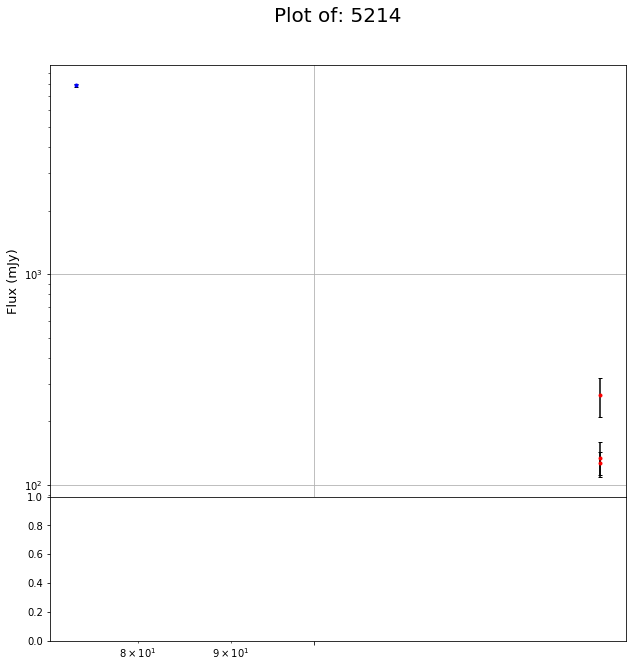

[1400. 1400.  151.  325.   74.]
with a goodness of fit of: 2.860 and a dof of: 3.0


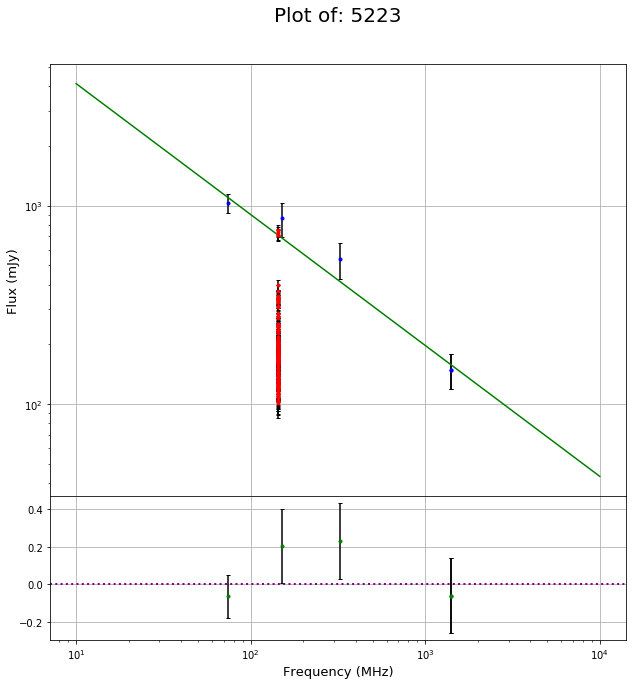

[1400.   325.   147.5   74. ]
with a goodness of fit of: 0.631 and a dof of: 2.0


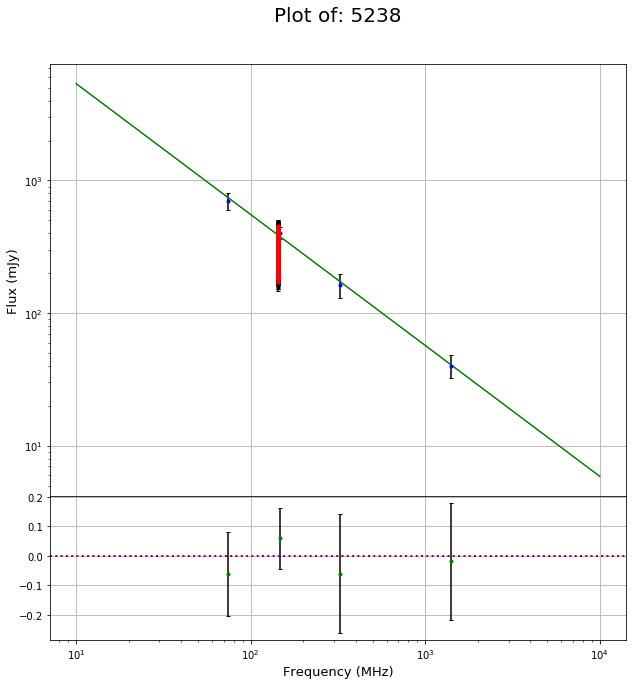

[1400.  325. 1400.   74.]
with a goodness of fit of: 0.944 and a dof of: 2.0


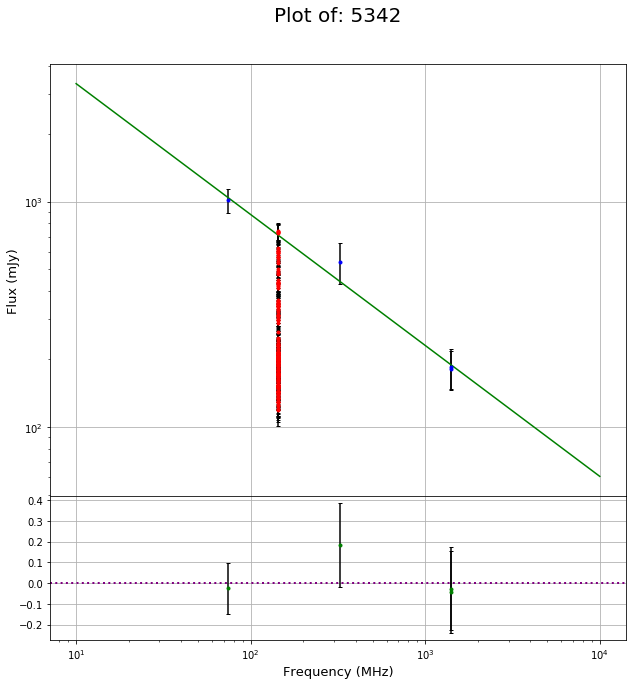

hoi
[147.5  74. ]
with a goodness of fit of: 0.000 and a dof of: 0.0


/home/antoniar/virtenv/local/lib/python2.7/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


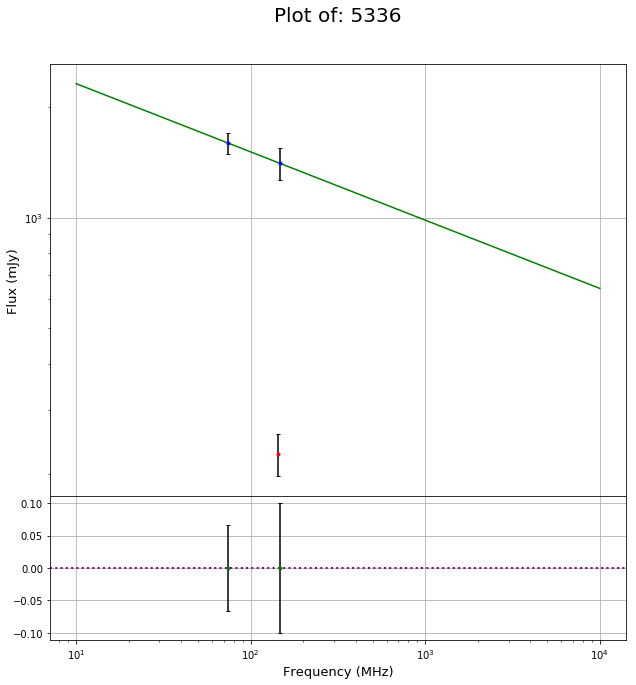

[ 325.  8400.   147.5   74. ]
with a goodness of fit of: 0.095 and a dof of: 2.0


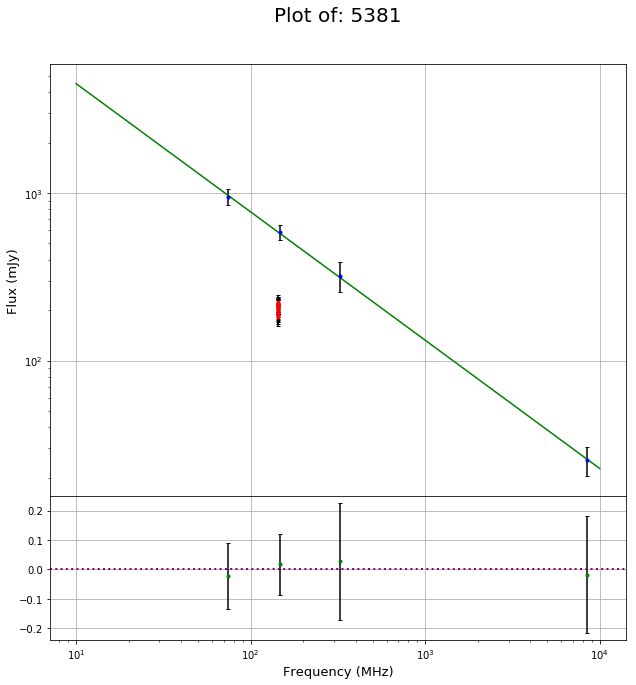

hoi
[147.5  74. ]
with a goodness of fit of: 0.000 and a dof of: 0.0


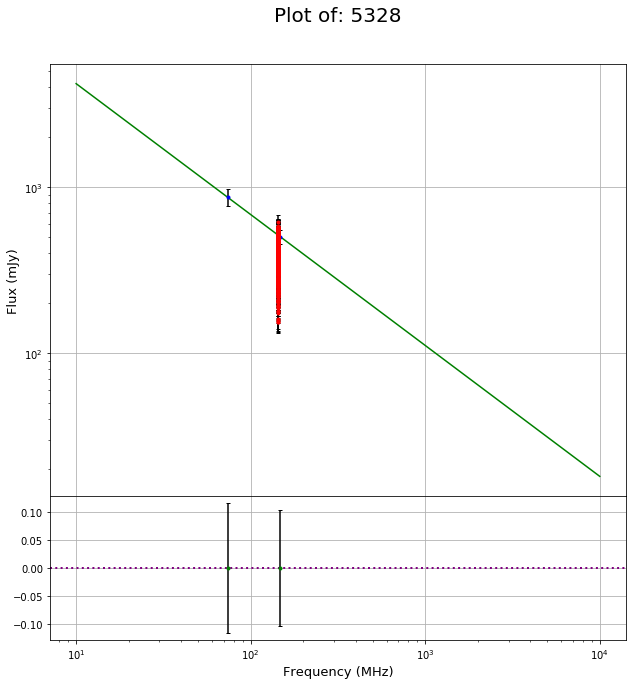

hoi
[147.5  74. ]
with a goodness of fit of: 0.000 and a dof of: 0.0


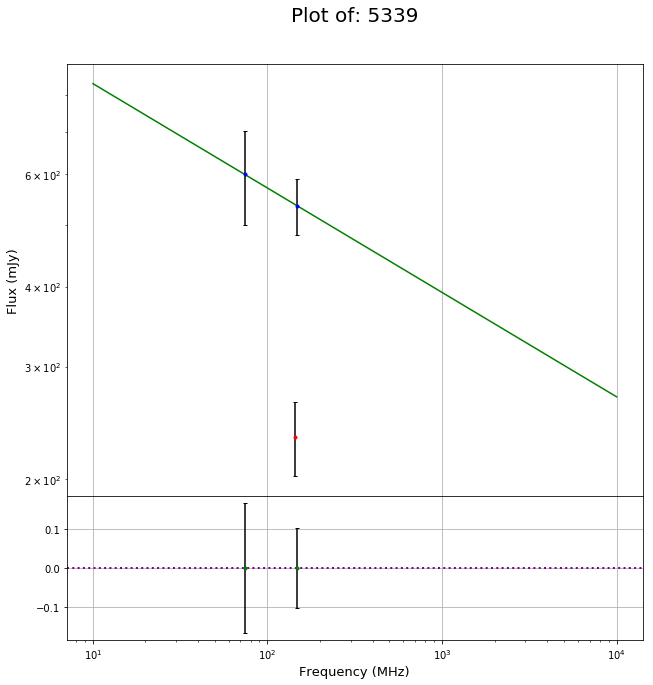

In [47]:
storedfitvalueslist = []
# initialize x
x = np.arange(1e1, 1e4, 1)

# loops through the data gathered sorting by id and plotting the fit

for i in dfFlux.id.unique():
    specid = dfFlux[dfFlux.id == i]
    ids = int(i)
    try:
        freq = np.array(specid.nu.astype(float))
        flux = np.array(specid.s_nu.astype(float))
        fluxerr = np.array(specid.e.astype(float))
    except:
        print 'hoi'
        freq = np.array([])
        flux = np.array([])
        fluxerr=np.array([])
    
#     Append catalogue data to the set:
    for j in FluxVar.instances:
        if j.id == ids:
            freq = np.append(freq,j.database.freq)
            flux = np.append(flux,j.database.pflux[j.entry]*10**3 )
            fluxerr = np.append(fluxerr,j.database.pfluxe[j.entry]*10**3 )

    print freq
    
    #Initialize figure
    fig1 = plt.figure(1,figsize=(10,10))
    fig1.suptitle("Plot of: " + str(ids),fontsize=20)
    
    #add first frame
    frame1=fig1.add_axes((.1,.3,.8,.6))
    matplotlibfunction(frame1,freq,flux,fluxerr,"blue")
    

    
    try:
        fit,chisquare,dof,ml_cfpars, ml_cfcovar = fitexistingdata(freq,flux,fluxerr,ids,x)

    except:
        print "for id: %i there is no good fit" %ids
        chisquare = 0
        dof = 0
        fit = None
        ml_cfpars = None
        print freq

    
    try:
        print "with a goodness of fit of: %0.3f and a dof of: %0.1f" %(chisquare,dof)
        
    except:
        pass
    
    getSourceData2(frame1,int(ids),colour = 'red')
    
#   initialize normal frame
    frame1.set_xscale('log')
    frame1.set_yscale('log')
    frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
    frame1.set_ylabel("Flux (mJy)",fontsize = 13)
    try:
        plt.plot(x,fit,color='green')
    except:
        pass
    plt.grid()
    
    #   initialize residual frame
    try:
        frame2=fig1.add_axes((.1,.1,.8,.2),sharex = frame1) 
        matplotlibfunction(frame2,freq,(flux-starmodel2(freq,*ml_cfpars))/flux,fluxerr/flux,'green')
        plt.axhline(0.0, color='purple', linestyle='dotted', lw=2)
        frame2.set_xscale('log')
        frame2.set_xlabel('Frequency (MHz)',fontsize=13)
        plt.grid()
    except:
        pass

    if savefigs:
        try:
            homedir = os.getcwd()
            newdir = homedir+"/" +timescale+"_"+ technique
            os.mkdir(newdir)
            os.chdir(newdir)
            plt.savefig(timescale + str(ids) +".png" )
            os.chdir(homedir)
        except:
            os.chdir(newdir)
            plt.savefig(timescale + str(ids) +".png" )
            os.chdir(homedir)
    try:
        storedfitvalueslist.append([ids,chisquare,dof])
    except:
        storedfitvalueslist.append([ids,0,0])
    plt.show() 
    


In [48]:
# print storedfitvalueslist

# Do not add tgss or vlssr data to the fit for this singular source where shit hits the fan

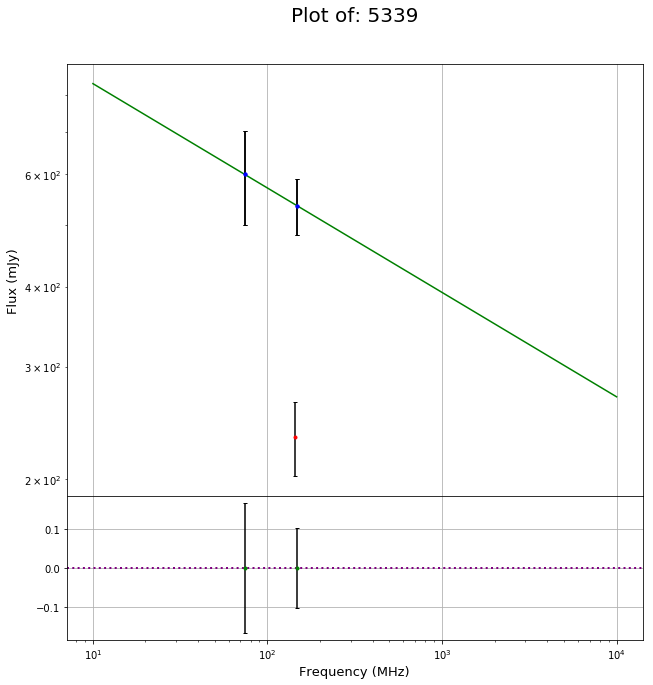

__________________________________________________________________________________________


In [49]:
weirdactingid = 7605
for i in dfFlux.id.unique():
    if i == str(weirdactingid):
        specid = dfFlux[dfFlux.id == i]
        ids = int(i)
        freq = np.array(specid.nu.astype(float))
        flux = np.array(specid.s_nu.astype(float))
        fluxerr = np.array(specid.e.astype(float))
        ids = int(i)
        
for i in range(len(storedfitvalueslist)):
    if storedfitvalueslist[i][0]== weirdactingid:
        print storedfitvalueslist[i]
        del(storedfitvalueslist[i])
        
# Initialize figure
fig1 = plt.figure(1,figsize=(10,10))
fig1.suptitle("Plot of: " + str(ids),fontsize=20)

#add frame1
frame1=fig1.add_axes((.1,.3,.8,.6))
matplotlibfunction(frame1,freq,flux,fluxerr,"blue")


# initialize x
x = np.arange(1e1, 1e4, 1)
try:
    fit,chisquare,dof,ml_cfpars, ml_cfcovar = fitexistingdata(freq,flux,fluxerr,ids,x)

except:
    print "for id: %i there is no good fit" %ids
    print freq
    
    
    

for j in FluxVar.instances:
    if j.id == ids:

        matplotlibfunction(frame1,j.database.freq,j.database.pflux[j.entry]*10**3,j.database.pfluxe[j.entry]*10**3,colour='blue')



getSourceData2(frame1,int(ids),colour = 'red')

# Initialize normal frame
frame1.set_xscale('log')
frame1.set_yscale('log')
frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
frame1.set_ylabel("Flux (mJy)",fontsize = 13)
plt.plot(x,fit,color='green')
plt.grid()

# initialize residuals frame
frame2=fig1.add_axes((.1,.1,.8,.2),sharex = frame1) 
matplotlibfunction(frame2,freq,(flux-starmodel2(freq,*ml_cfpars))/flux,fluxerr/flux,'green')
plt.axhline(0.0, color='purple', linestyle='dotted', lw=2)
frame2.set_xscale('log')
frame2.set_xlabel('Frequency (MHz)',fontsize=13)
plt.grid()

storedfitvalueslist.append([ids,chisquare,dof])
# if we wanna save we save
if savefigs:
    os.chdir(newdir)
    plt.savefig(timescale + str(ids) +".png" )
    os.chdir(homedir)
plt.show()
# make figure for and get the residuals

# p = figure(title="residuals", x_axis_label='freq (MHz)', y_axis_label='flux(mJy)',x_axis_type='log')


# p = bokehplotfunction(p,freq,(flux-starmodel2(freq,*ml_cfpars))/flux,fluxerr/flux,'green')
# p.line(x,0,color='purple',line_dash='dashed')

# show(p)
print "__________________________________________________________________________________________"

# Make Reg.file for quick comparison in original data

In [50]:
try:
    os.chdir(newdir)
except:
    homedir = os.getcwd()
    newdir = homedir+"/" +timescale+ "_"+technique
    os.mkdir(newdir)
    os.chdir(newdir)

wr.WriteReg(timescale,PosVar.instances,FluxVar.instances)
os.chdir(homedir)

# TEST MAKE IMAGES FOR TGSS

In [51]:
jsonwriter.WriteFluxJson(FluxVar.instances,pos=True)
jsonFile = open("tgpos.json","r")
datalistjson = json.load(jsonFile)
n = len(datalistjson)
jsonFile.close()
try:
    os.remove('poslink.json')
except:
    print 'allready removed'
for i in range(n):
    !{sys.executable} -m scrapy runspider databasescrapper.py -o poslink.json






allready removed
2019-08-27 20:15:49 [scrapy.utils.log] INFO: Scrapy 1.7.3 started (bot: scrapybot)
2019-08-27 20:15:49 [scrapy.utils.log] INFO: Versions: lxml 4.4.0.0, libxml2 2.9.9, cssselect 1.1.0, parsel 1.5.2, w3lib 1.21.0, Twisted 19.2.1, Python 2.7.12 (default, Jan  9 2017, 12:16:27) - [GCC 4.8.4], pyOpenSSL 19.0.0 (OpenSSL 1.1.1c  28 May 2019), cryptography 2.7, Platform Linux-3.13.0-147-generic-x86_64-with-Ubuntu-14.04-trusty
2019-08-27 20:15:49 [scrapy.crawler] INFO: Overridden settings: {'SPIDER_LOADER_WARN_ONLY': True, 'FEED_FORMAT': 'json', 'FEED_URI': 'poslink.json'}
2019-08-27 20:15:49 [scrapy.extensions.telnet] INFO: Telnet Password: 220d9dec1231b627
2019-08-27 20:15:49 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.feedexport.FeedExporter',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.logstats.LogStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.corestats.CoreStats']
2019-08-27 20:15:49 [scrapy.middleware] INFO:

2019-08-27 20:15:51 [scrapy.utils.log] INFO: Scrapy 1.7.3 started (bot: scrapybot)
2019-08-27 20:15:51 [scrapy.utils.log] INFO: Versions: lxml 4.4.0.0, libxml2 2.9.9, cssselect 1.1.0, parsel 1.5.2, w3lib 1.21.0, Twisted 19.2.1, Python 2.7.12 (default, Jan  9 2017, 12:16:27) - [GCC 4.8.4], pyOpenSSL 19.0.0 (OpenSSL 1.1.1c  28 May 2019), cryptography 2.7, Platform Linux-3.13.0-147-generic-x86_64-with-Ubuntu-14.04-trusty
2019-08-27 20:15:51 [scrapy.crawler] INFO: Overridden settings: {'SPIDER_LOADER_WARN_ONLY': True, 'FEED_FORMAT': 'json', 'FEED_URI': 'poslink.json'}
2019-08-27 20:15:51 [scrapy.extensions.telnet] INFO: Telnet Password: 45c5023a9932b17f
2019-08-27 20:15:51 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.feedexport.FeedExporter',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.logstats.LogStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.corestats.CoreStats']
2019-08-27 20:15:51 [scrapy.middleware] INFO: Enabled download

2019-08-27 20:15:54 [scrapy.utils.log] INFO: Scrapy 1.7.3 started (bot: scrapybot)
2019-08-27 20:15:54 [scrapy.utils.log] INFO: Versions: lxml 4.4.0.0, libxml2 2.9.9, cssselect 1.1.0, parsel 1.5.2, w3lib 1.21.0, Twisted 19.2.1, Python 2.7.12 (default, Jan  9 2017, 12:16:27) - [GCC 4.8.4], pyOpenSSL 19.0.0 (OpenSSL 1.1.1c  28 May 2019), cryptography 2.7, Platform Linux-3.13.0-147-generic-x86_64-with-Ubuntu-14.04-trusty
2019-08-27 20:15:54 [scrapy.crawler] INFO: Overridden settings: {'SPIDER_LOADER_WARN_ONLY': True, 'FEED_FORMAT': 'json', 'FEED_URI': 'poslink.json'}
2019-08-27 20:15:54 [scrapy.extensions.telnet] INFO: Telnet Password: b9ef98d5548814b3
2019-08-27 20:15:54 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.feedexport.FeedExporter',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.logstats.LogStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.corestats.CoreStats']
2019-08-27 20:15:54 [scrapy.middleware] INFO: Enabled download

## Download tgss fits images

In [52]:
os.chdir(homedir)
try:
    os.rename(homedir+"/poslink.json", newdir+"/poslink.json")
except:
    pass
try:
    os.rename(homedir+"/downloader.py", newdir+"/downloader.py")
except:
    pass


os.chdir(newdir)
!{sys.executable} downloader.py

try:
    os.rename(newdir+"/downloader.py", homedir+"/downloader.py")
except:
    pass

os.chdir(homedir)



{u'url': u'https://vo.astron.nl/getproduct/tgssadr/fits/TGSSADR_R42D64_5x5.MOSAIC.FITS?sdec=0.25\\&dec=52.5605\\&ra=210.3163\\&sra=0.389864794547', u'id': u'5238', u'name': u'tgss'}
--2019-08-27 20:15:55--  https://vo.astron.nl/getproduct/tgssadr/fits/TGSSADR_R42D64_5x5.MOSAIC.FITS?sdec=0.25&dec=52.5605&ra=210.3163&sra=0.389864794547
Resolving vo.astron.nl (vo.astron.nl)... 192.87.1.9
Connecting to vo.astron.nl (vo.astron.nl)|192.87.1.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/fits]
Saving to: '5238tgss.fits'

    [ <=>                                   ] 86,400      --.-K/s   in 0.003s  

2019-08-27 20:15:55 (26.5 MB/s) - '5238tgss.fits' saved [86400]

{u'url': u'https://vo.astron.nl/getproduct/tgssadr/fits/TGSSADR_R42D64_5x5.MOSAIC.FITS?sdec=0.25\\&dec=51.8442\\&ra=210.6749\\&sra=0.389864794547', u'id': u'5381', u'name': u'tgss'}
--2019-08-27 20:15:55--  https://vo.astron.nl/getproduct/tgssadr/fits/TGSSADR_R42D64_5x5.MOSAIC.FITS?sde

## Convert fits to png

In [53]:

# os.chdir(newdir)
# imagez = glob.glob('*.fits')
# # for i in imagez:
# # #     print i
# #     rpf.Imager(i)
# for i in PosVar.instances:
#     if i.dataname == 'tgss':
#         a = str(i.id) +'tgss.fits'
#         print i.ra
#         print i.dec
#         print i.id
#         rpf.Imager(a,i.ra,i.dec)



# Make cutouts vlssr

In [54]:
os.chdir(homedir)
os.chdir(newdir)

for i in PosVar.instances:
    if i.dataname == 'vlssr':
        ct.GetCutout('../vlssrimage.fits',i.ra,i.dec,i.id,'vlssr')
#         ct.GetCutout('../vlssrimage.fits',i.ra,i.dec,i.id,(120,120),'vlssr')

IOError: [Errno 2] No such file or directory: '../vlssrimage.fits'

# Make cutouts tgss

/home/zmeyers/notebooks/KrieksNotebook/updatd/KrieksNotebook/KrieksTransients/P20_eight_DDbatch2
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 207.5  51.08  
CRPIX : 1060.0  -803.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.001722222194  0.001722222194  
NAXIS : 0  0
[120. 120.] pix
WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  'STOKES'  
CRVAL : 207.5  51.08  147500000.0  1.0  
CRPIX : 1060.0  -803.0  1.0  1.0  
NAXIS : 132  151  1  1


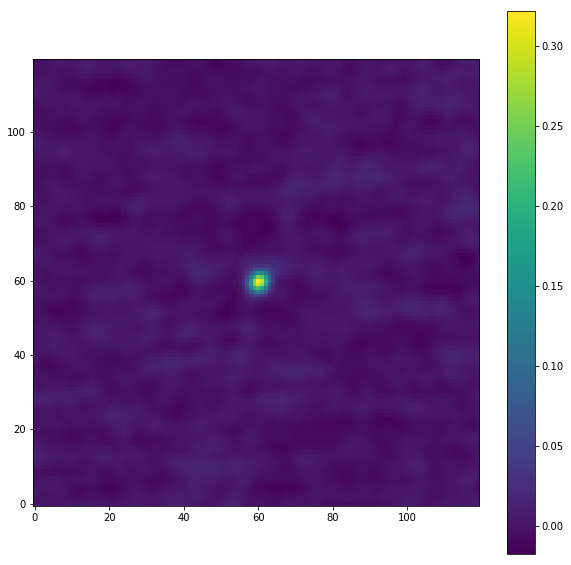

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 207.5  51.08  
CRPIX : 1206.0  -392.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.001722222194  0.001722222194  
NAXIS : 0  0
[120. 120.] pix
WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  'STOKES'  
CRVAL : 207.5  51.08  147500000.0  1.0  
CRPIX : 1206.0  -392.0  1.0  1.0  
NAXIS : 135  152  1  1


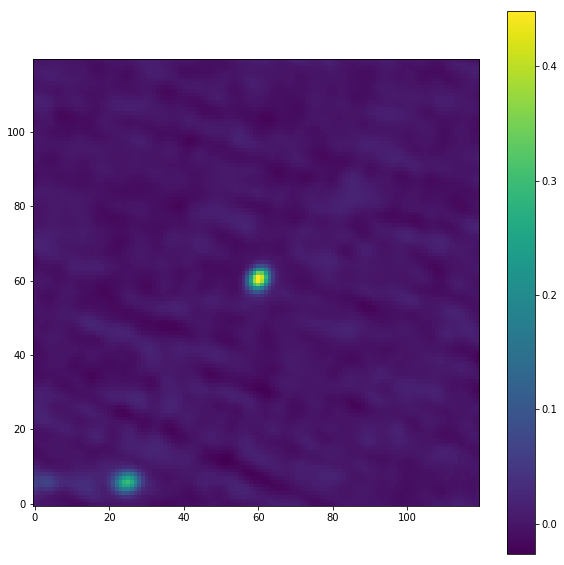

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 207.5  51.08  
CRPIX : 1153.0  -234.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.001722222194  0.001722222194  
NAXIS : 0  0
[120. 120.] pix
WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  'STOKES'  
CRVAL : 207.5  51.08  147500000.0  1.0  
CRPIX : 1153.0  -234.0  1.0  1.0  
NAXIS : 135  152  1  1


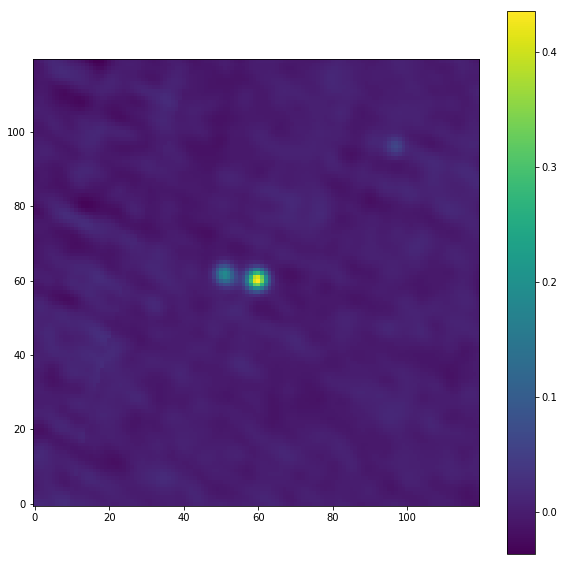

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 207.5  51.08  
CRPIX : 1031.0  -630.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.001722222194  0.001722222194  
NAXIS : 0  0
[120. 120.] pix
WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  'STOKES'  
CRVAL : 207.5  51.08  147500000.0  1.0  
CRPIX : 1031.0  -630.0  1.0  1.0  
NAXIS : 134  151  1  1


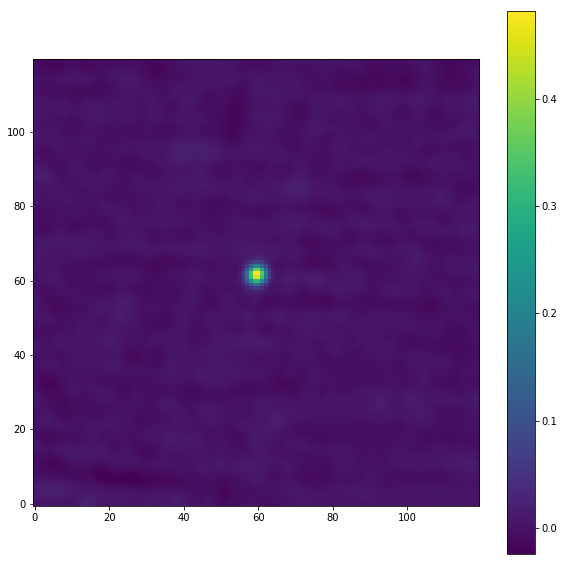

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 207.5  51.08  
CRPIX : 1176.0  -523.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.001722222194  0.001722222194  
NAXIS : 0  0
[120. 120.] pix
WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  'STOKES'  
CRVAL : 207.5  51.08  147500000.0  1.0  
CRPIX : 1176.0  -523.0  1.0  1.0  
NAXIS : 134  152  1  1


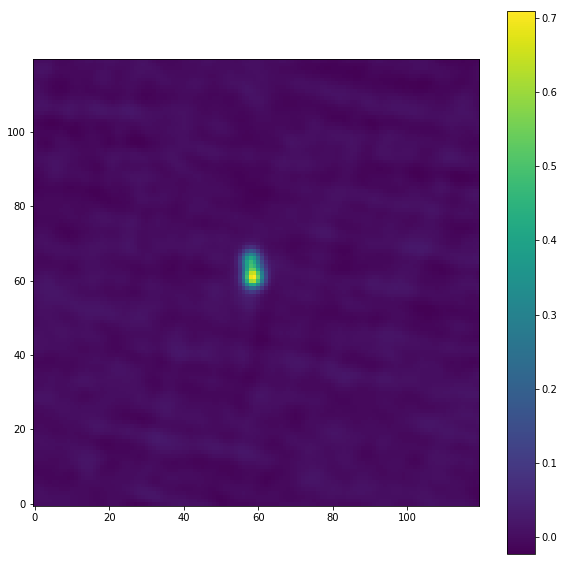

In [59]:
os.chdir(homedir)
# os.rename('tgssimage.fits','/'+newdir+"tgssimage.fits")
os.chdir(newdir)
print newdir

for i in FluxVar.instances:
    if i.dataname == 'tgss':
        #print os.getcwd()
        cutfits = str(i.id) + 'tgss.fits'
        ct.GetCutout(cutfits,i.ra,i.dec,i.id,'tgss')
#         ct.GetCutout('../tgssimage.fits',i.ra,i.dec,i.id,(120,120),'tgss')


##VLSSR

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 180.0  45.0  
CRPIX : 2040.0  2040.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.004166667  0.004166667  
NAXIS : 0  0
[120. 120.] pix
WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  'STOKES'  
CRVAL : 180.0  45.0  73793896.48435  1.0  
CRPIX : 2040.0  2040.0  1.0  1.0  
NAXIS : 4079  4079  1  1
##TGSS
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 184.9973647014  46.77399545885  
CRPIX : 2643.0  2807.0  
CD1_1 CD1_2  : -0.001722222194076  0.0  
CD2_1 CD2_2  : 0.0  0.001722222194076  
NAXIS : 0  0
[120. 120.] pix
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 184.9973647014  46.77399545885  
CRPIX : 2643.0  2807.0  
CD1_1 CD1_2  : -0.001722222194076  0.0  
CD2_1 CD2_2  : 0.0  0.001722222194076  
NAXIS : 5285  5613



# Check weird source!

In [56]:
for i in FluxVar.instances:
    if i.id == 3743:
        print i.id
        ct.GetCutout('../vlssrimage.fits',i.ra,i.dec,i.id,'vlssr')
        ct.GetCutout('../tgssimage.fits',i.ra,i.dec,i.id,'tgss')
        url = '/scratch/kmeulen/SourceSubstractedP23HetdexDir/Images/August/10min/10min_allband-t0018-image-pb.fits'
        ct.GetCutout(url,i.ra,i.dec,i.id)
    if i.id == 4320:
        print i.id
        ct.GetCutout('../vlssrimage.fits',i.ra,i.dec,i.id,'vlssr')
        ct.GetCutout('../tgssimage.fits',i.ra,i.dec,i.id,'tgss')
        print i.ra
        print i.dec
        url = '/scratch/kmeulen/SourceSubstractedP23HetdexDir/Images/August/10min/10min_allband-t0029-image-pb.fits'
#         print i.ra
#         print i.dec
#         url = '/scratch/kmeulen/SourceSubstractedP23HetdexDir/Images/August/1hr/1hr_allband-t0003-image-pb.fits'
        
        ct.GetCutout(i.url[0],i.ra,i.dec,i.id)

# Make cutouts of own dataset

[u'/scratch/zmeyers/2019/HetDex/P210+52/eight/8sec_P210+52-t3821-image.fits']
5266
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 210.684416667  52.4194108333  
CRPIX : 1025.0  1025.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00125  0.00125  
NAXIS : 0  0
[120. 120.] pix
WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  'STOKES'  
CRVAL : 210.684416667  52.4194108333  143650817.871094  1.0  
CRPIX : 1025.0  1025.0  1.0  1.0  
PC1_1 PC1_2 PC1_3 PC1_4  : 1.0  0.0  0.0  0.0  
PC2_1 PC2_2 PC2_3 PC2_4  : 0.0  1.0  0.0  0.0  
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0  0.0  1.0  0.0  
PC4_1 PC4_2 PC4_3 PC4_4  : 0.0  0.0  0.0  1.0  
CDELT : -0.00125  0.00125  46875000.0  1.0  
NAXIS : 2048  2048  1  1


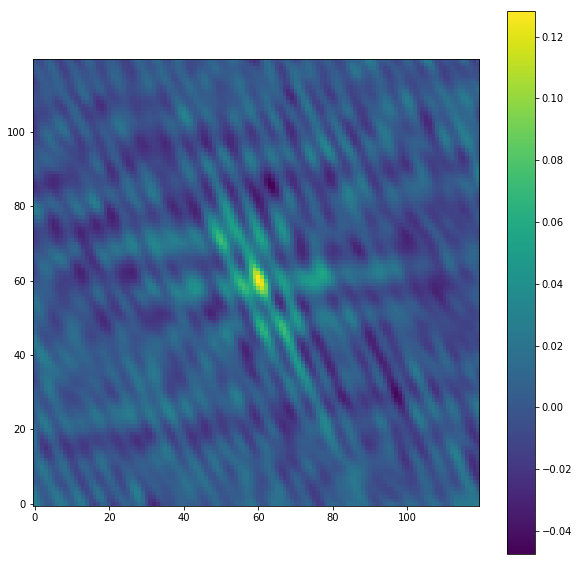

[u'/scratch/zmeyers/2019/HetDex/P210+52/eight/8sec_P210+52-t3821-image.fits']
5393
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 210.684416667  52.4194108333  
CRPIX : 1025.0  1025.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00125  0.00125  
NAXIS : 0  0
[120. 120.] pix
WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  'STOKES'  
CRVAL : 210.684416667  52.4194108333  143650817.871094  1.0  
CRPIX : 1025.0  1025.0  1.0  1.0  
PC1_1 PC1_2 PC1_3 PC1_4  : 1.0  0.0  0.0  0.0  
PC2_1 PC2_2 PC2_3 PC2_4  : 0.0  1.0  0.0  0.0  
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0  0.0  1.0  0.0  
PC4_1 PC4_2 PC4_3 PC4_4  : 0.0  0.0  0.0  1.0  
CDELT : -0.00125  0.00125  46875000.0  1.0  
NAXIS : 2048  2048  1  1


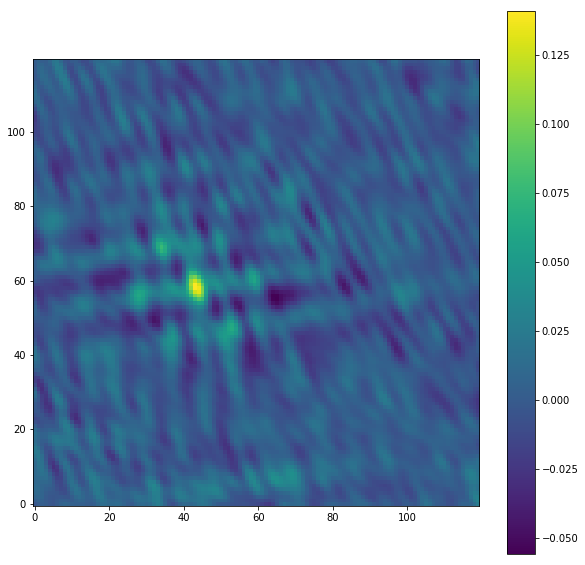

[u'/scratch/zmeyers/2019/HetDex/P210+52/eight/8sec_P210+52-t3821-image.fits']
5223
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 210.684416667  52.4194108333  
CRPIX : 1025.0  1025.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00125  0.00125  
NAXIS : 0  0
[120. 120.] pix
WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  'STOKES'  
CRVAL : 210.684416667  52.4194108333  143650817.871094  1.0  
CRPIX : 1025.0  1025.0  1.0  1.0  
PC1_1 PC1_2 PC1_3 PC1_4  : 1.0  0.0  0.0  0.0  
PC2_1 PC2_2 PC2_3 PC2_4  : 0.0  1.0  0.0  0.0  
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0  0.0  1.0  0.0  
PC4_1 PC4_2 PC4_3 PC4_4  : 0.0  0.0  0.0  1.0  
CDELT : -0.00125  0.00125  46875000.0  1.0  
NAXIS : 2048  2048  1  1


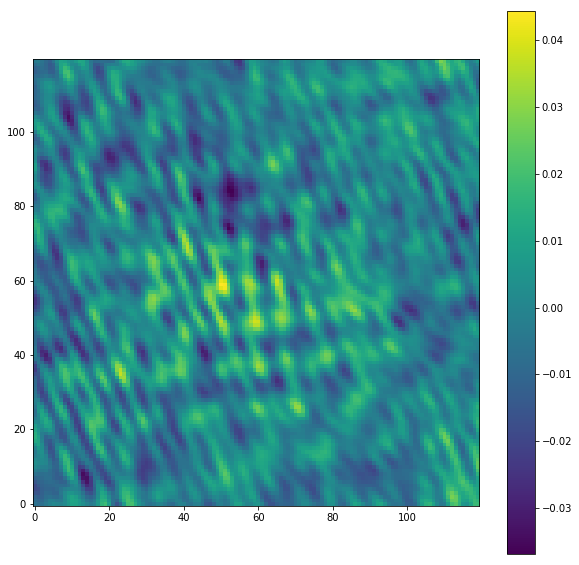

[u'/scratch/zmeyers/2019/HetDex/P210+52/eight/8sec_P210+52-t3821-image.fits']
5226
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 210.684416667  52.4194108333  
CRPIX : 1025.0  1025.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00125  0.00125  
NAXIS : 0  0
[120. 120.] pix
WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  'STOKES'  
CRVAL : 210.684416667  52.4194108333  143650817.871094  1.0  
CRPIX : 1025.0  1025.0  1.0  1.0  
PC1_1 PC1_2 PC1_3 PC1_4  : 1.0  0.0  0.0  0.0  
PC2_1 PC2_2 PC2_3 PC2_4  : 0.0  1.0  0.0  0.0  
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0  0.0  1.0  0.0  
PC4_1 PC4_2 PC4_3 PC4_4  : 0.0  0.0  0.0  1.0  
CDELT : -0.00125  0.00125  46875000.0  1.0  
NAXIS : 2048  2048  1  1


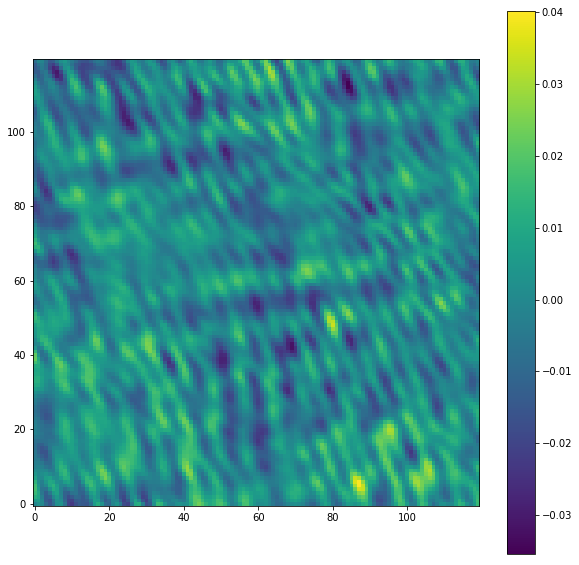

[u'/scratch/zmeyers/2019/HetDex/P210+52/eight/8sec_P210+52-t3821-image.fits']
5342
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 210.684416667  52.4194108333  
CRPIX : 1025.0  1025.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00125  0.00125  
NAXIS : 0  0
[120. 120.] pix
WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  'STOKES'  
CRVAL : 210.684416667  52.4194108333  143650817.871094  1.0  
CRPIX : 1025.0  1025.0  1.0  1.0  
PC1_1 PC1_2 PC1_3 PC1_4  : 1.0  0.0  0.0  0.0  
PC2_1 PC2_2 PC2_3 PC2_4  : 0.0  1.0  0.0  0.0  
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0  0.0  1.0  0.0  
PC4_1 PC4_2 PC4_3 PC4_4  : 0.0  0.0  0.0  1.0  
CDELT : -0.00125  0.00125  46875000.0  1.0  
NAXIS : 2048  2048  1  1


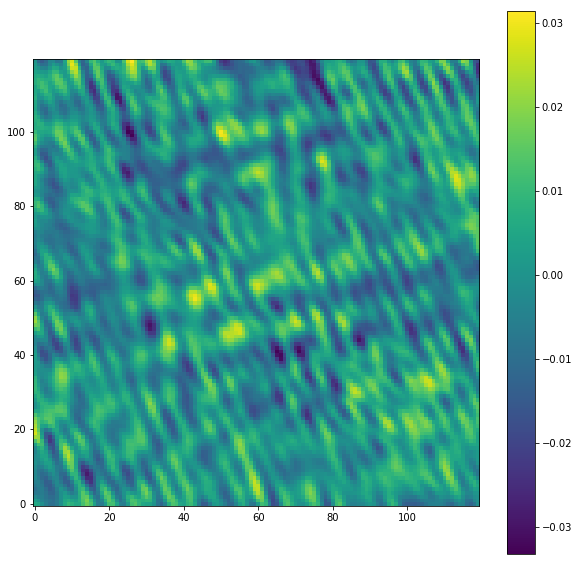

[u'/scratch/zmeyers/2019/HetDex/P210+52/eight/8sec_P210+52-t3821-image.fits']
5289
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 210.684416667  52.4194108333  
CRPIX : 1025.0  1025.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00125  0.00125  
NAXIS : 0  0
[120. 120.] pix
WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  'STOKES'  
CRVAL : 210.684416667  52.4194108333  143650817.871094  1.0  
CRPIX : 1025.0  1025.0  1.0  1.0  
PC1_1 PC1_2 PC1_3 PC1_4  : 1.0  0.0  0.0  0.0  
PC2_1 PC2_2 PC2_3 PC2_4  : 0.0  1.0  0.0  0.0  
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0  0.0  1.0  0.0  
PC4_1 PC4_2 PC4_3 PC4_4  : 0.0  0.0  0.0  1.0  
CDELT : -0.00125  0.00125  46875000.0  1.0  
NAXIS : 2048  2048  1  1


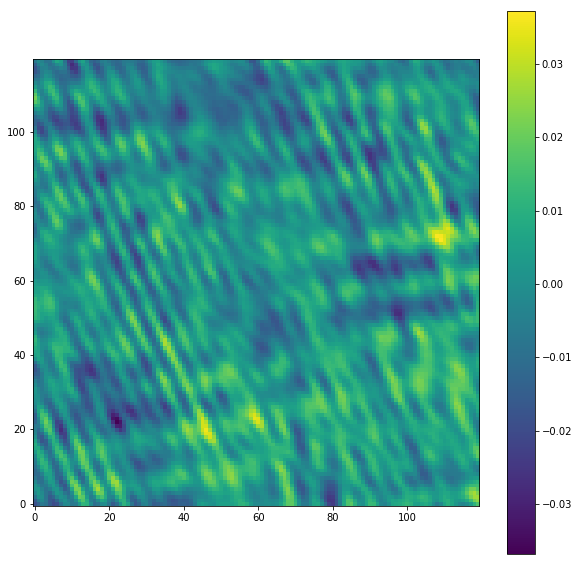

[u'/scratch/zmeyers/2019/HetDex/P210+52/eight/8sec_P210+52-t3821-image.fits']
5286
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 210.684416667  52.4194108333  
CRPIX : 1025.0  1025.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00125  0.00125  
NAXIS : 0  0
[120. 120.] pix
WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  'STOKES'  
CRVAL : 210.684416667  52.4194108333  143650817.871094  1.0  
CRPIX : 1025.0  1025.0  1.0  1.0  
PC1_1 PC1_2 PC1_3 PC1_4  : 1.0  0.0  0.0  0.0  
PC2_1 PC2_2 PC2_3 PC2_4  : 0.0  1.0  0.0  0.0  
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0  0.0  1.0  0.0  
PC4_1 PC4_2 PC4_3 PC4_4  : 0.0  0.0  0.0  1.0  
CDELT : -0.00125  0.00125  46875000.0  1.0  
NAXIS : 2048  2048  1  1


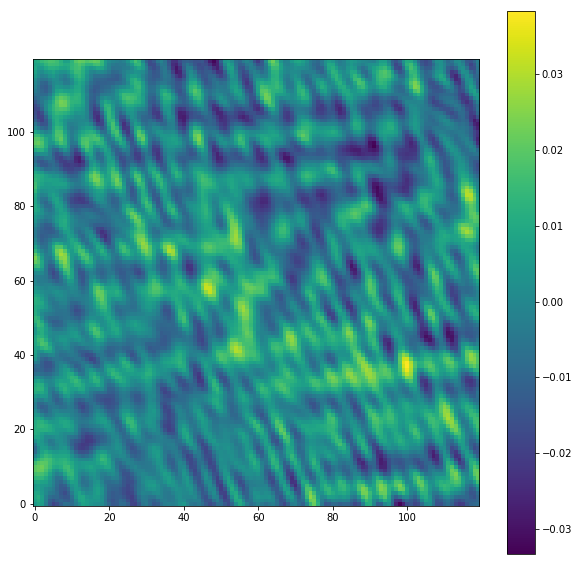

[u'/scratch/zmeyers/2019/HetDex/P210+52/eight/8sec_P210+52-t3821-image.fits']
5274
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 210.684416667  52.4194108333  
CRPIX : 1025.0  1025.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00125  0.00125  
NAXIS : 0  0
[120. 120.] pix
WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  'STOKES'  
CRVAL : 210.684416667  52.4194108333  143650817.871094  1.0  
CRPIX : 1025.0  1025.0  1.0  1.0  
PC1_1 PC1_2 PC1_3 PC1_4  : 1.0  0.0  0.0  0.0  
PC2_1 PC2_2 PC2_3 PC2_4  : 0.0  1.0  0.0  0.0  
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0  0.0  1.0  0.0  
PC4_1 PC4_2 PC4_3 PC4_4  : 0.0  0.0  0.0  1.0  
CDELT : -0.00125  0.00125  46875000.0  1.0  
NAXIS : 2048  2048  1  1


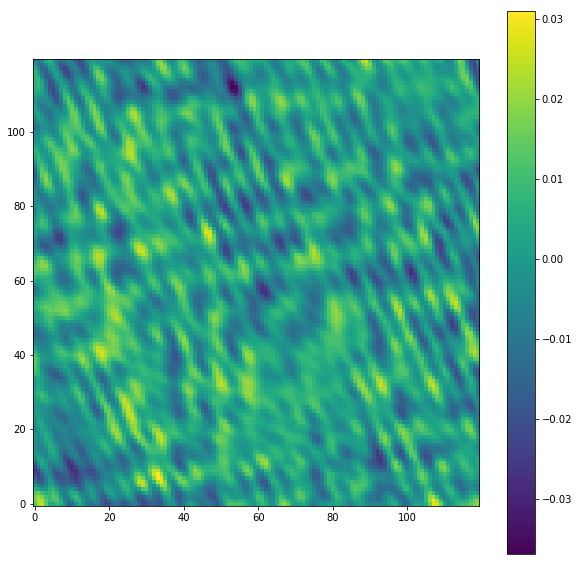

[u'/scratch/zmeyers/2019/HetDex/P210+52/eight/8sec_P210+52-t3821-image.fits']
5214
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 210.684416667  52.4194108333  
CRPIX : 1025.0  1025.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00125  0.00125  
NAXIS : 0  0
[120. 120.] pix
WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  'STOKES'  
CRVAL : 210.684416667  52.4194108333  143650817.871094  1.0  
CRPIX : 1025.0  1025.0  1.0  1.0  
PC1_1 PC1_2 PC1_3 PC1_4  : 1.0  0.0  0.0  0.0  
PC2_1 PC2_2 PC2_3 PC2_4  : 0.0  1.0  0.0  0.0  
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0  0.0  1.0  0.0  
PC4_1 PC4_2 PC4_3 PC4_4  : 0.0  0.0  0.0  1.0  
CDELT : -0.00125  0.00125  46875000.0  1.0  
NAXIS : 2048  2048  1  1


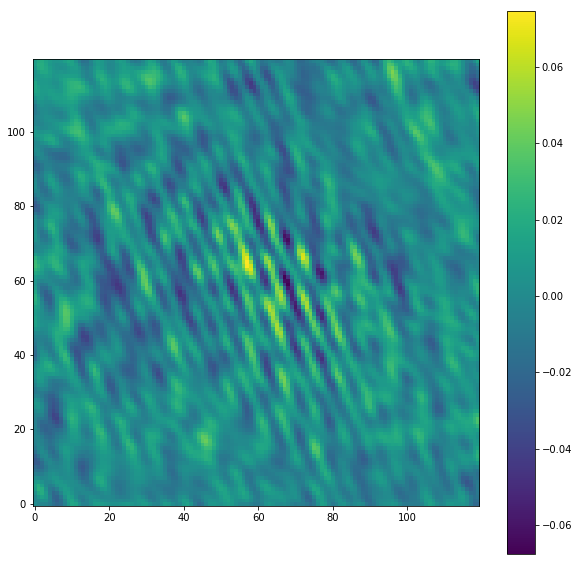

[u'/scratch/zmeyers/2019/HetDex/P210+52/eight/8sec_P210+52-t3821-image.fits']
5266
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 210.684416667  52.4194108333  
CRPIX : 1025.0  1025.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00125  0.00125  
NAXIS : 0  0
[120. 120.] pix
WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  'STOKES'  
CRVAL : 210.684416667  52.4194108333  143650817.871094  1.0  
CRPIX : 1025.0  1025.0  1.0  1.0  
PC1_1 PC1_2 PC1_3 PC1_4  : 1.0  0.0  0.0  0.0  
PC2_1 PC2_2 PC2_3 PC2_4  : 0.0  1.0  0.0  0.0  
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0  0.0  1.0  0.0  
PC4_1 PC4_2 PC4_3 PC4_4  : 0.0  0.0  0.0  1.0  
CDELT : -0.00125  0.00125  46875000.0  1.0  
NAXIS : 2048  2048  1  1


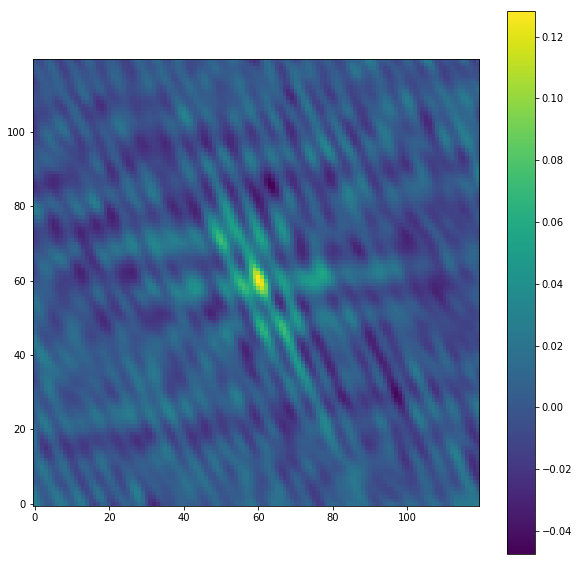

[u'/scratch/zmeyers/2019/HetDex/P210+52/eight/8sec_P210+52-t3821-image.fits']
5393
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 210.684416667  52.4194108333  
CRPIX : 1025.0  1025.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00125  0.00125  
NAXIS : 0  0
[120. 120.] pix
WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  'STOKES'  
CRVAL : 210.684416667  52.4194108333  143650817.871094  1.0  
CRPIX : 1025.0  1025.0  1.0  1.0  
PC1_1 PC1_2 PC1_3 PC1_4  : 1.0  0.0  0.0  0.0  
PC2_1 PC2_2 PC2_3 PC2_4  : 0.0  1.0  0.0  0.0  
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0  0.0  1.0  0.0  
PC4_1 PC4_2 PC4_3 PC4_4  : 0.0  0.0  0.0  1.0  
CDELT : -0.00125  0.00125  46875000.0  1.0  
NAXIS : 2048  2048  1  1


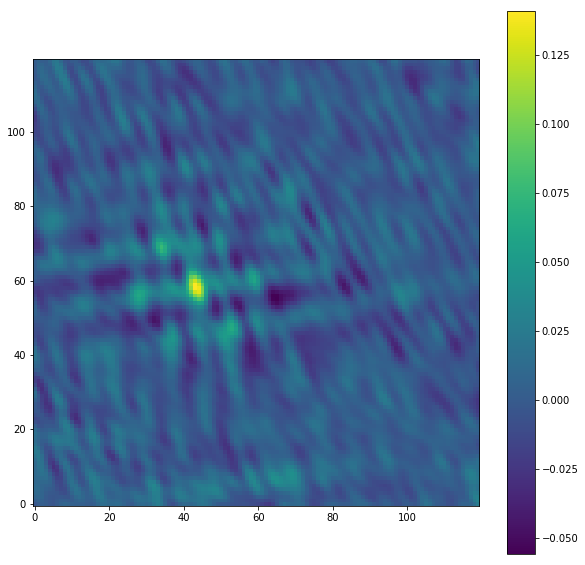

[u'/scratch/zmeyers/2019/HetDex/P210+52/eight/8sec_P210+52-t3821-image.fits']
5256
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 210.684416667  52.4194108333  
CRPIX : 1025.0  1025.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00125  0.00125  
NAXIS : 0  0
[120. 120.] pix
WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  'STOKES'  
CRVAL : 210.684416667  52.4194108333  143650817.871094  1.0  
CRPIX : 1025.0  1025.0  1.0  1.0  
PC1_1 PC1_2 PC1_3 PC1_4  : 1.0  0.0  0.0  0.0  
PC2_1 PC2_2 PC2_3 PC2_4  : 0.0  1.0  0.0  0.0  
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0  0.0  1.0  0.0  
PC4_1 PC4_2 PC4_3 PC4_4  : 0.0  0.0  0.0  1.0  
CDELT : -0.00125  0.00125  46875000.0  1.0  
NAXIS : 2048  2048  1  1


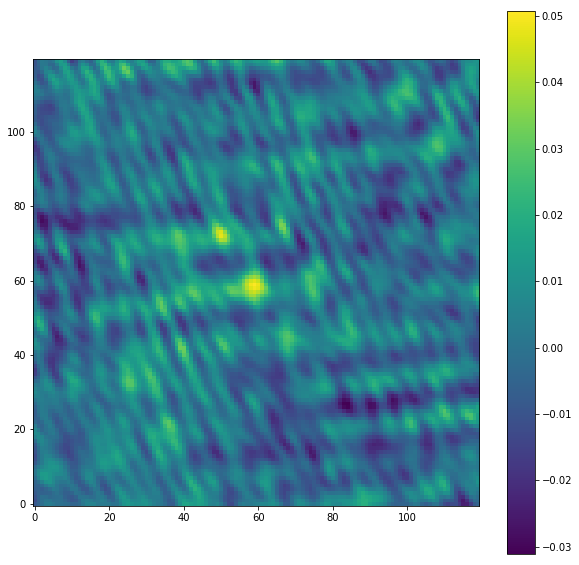

[u'/scratch/zmeyers/2019/HetDex/P210+52/eight/8sec_P210+52-t3821-image.fits']
5255
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 210.684416667  52.4194108333  
CRPIX : 1025.0  1025.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00125  0.00125  
NAXIS : 0  0
[120. 120.] pix
WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  'STOKES'  
CRVAL : 210.684416667  52.4194108333  143650817.871094  1.0  
CRPIX : 1025.0  1025.0  1.0  1.0  
PC1_1 PC1_2 PC1_3 PC1_4  : 1.0  0.0  0.0  0.0  
PC2_1 PC2_2 PC2_3 PC2_4  : 0.0  1.0  0.0  0.0  
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0  0.0  1.0  0.0  
PC4_1 PC4_2 PC4_3 PC4_4  : 0.0  0.0  0.0  1.0  
CDELT : -0.00125  0.00125  46875000.0  1.0  
NAXIS : 2048  2048  1  1


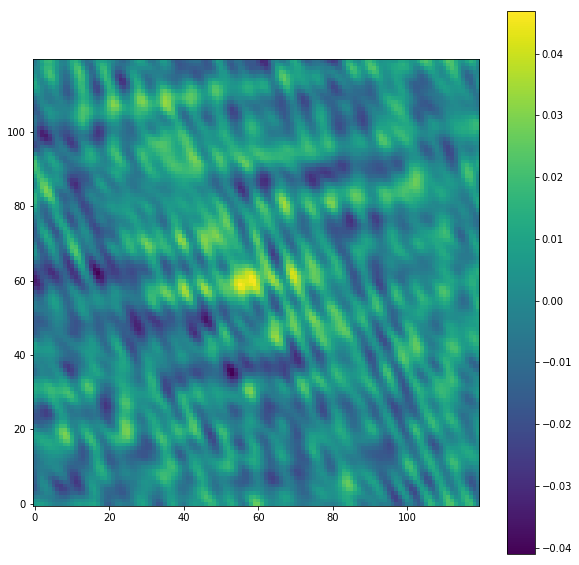

[u'/scratch/zmeyers/2019/HetDex/P210+52/eight/8sec_P210+52-t3821-image.fits']
5377
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 210.684416667  52.4194108333  
CRPIX : 1025.0  1025.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00125  0.00125  
NAXIS : 0  0
[120. 120.] pix
WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  'STOKES'  
CRVAL : 210.684416667  52.4194108333  143650817.871094  1.0  
CRPIX : 1025.0  1025.0  1.0  1.0  
PC1_1 PC1_2 PC1_3 PC1_4  : 1.0  0.0  0.0  0.0  
PC2_1 PC2_2 PC2_3 PC2_4  : 0.0  1.0  0.0  0.0  
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0  0.0  1.0  0.0  
PC4_1 PC4_2 PC4_3 PC4_4  : 0.0  0.0  0.0  1.0  
CDELT : -0.00125  0.00125  46875000.0  1.0  
NAXIS : 2048  2048  1  1


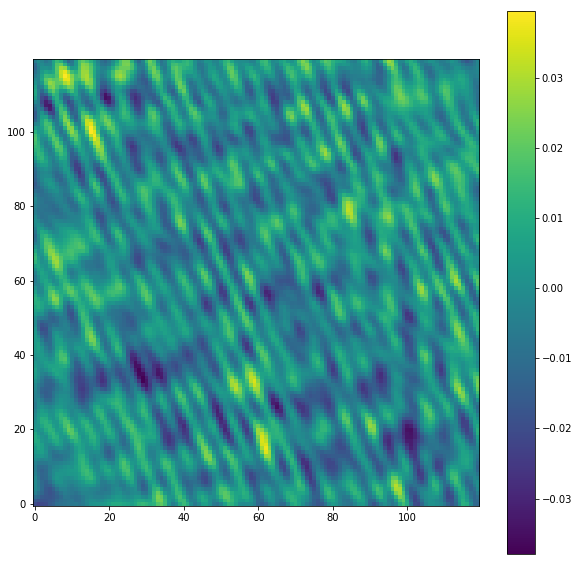

[u'/scratch/zmeyers/2019/HetDex/P210+52/eight/8sec_P210+52-t3821-image.fits']
5226
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 210.684416667  52.4194108333  
CRPIX : 1025.0  1025.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00125  0.00125  
NAXIS : 0  0
[120. 120.] pix
WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  'STOKES'  
CRVAL : 210.684416667  52.4194108333  143650817.871094  1.0  
CRPIX : 1025.0  1025.0  1.0  1.0  
PC1_1 PC1_2 PC1_3 PC1_4  : 1.0  0.0  0.0  0.0  
PC2_1 PC2_2 PC2_3 PC2_4  : 0.0  1.0  0.0  0.0  
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0  0.0  1.0  0.0  
PC4_1 PC4_2 PC4_3 PC4_4  : 0.0  0.0  0.0  1.0  
CDELT : -0.00125  0.00125  46875000.0  1.0  
NAXIS : 2048  2048  1  1


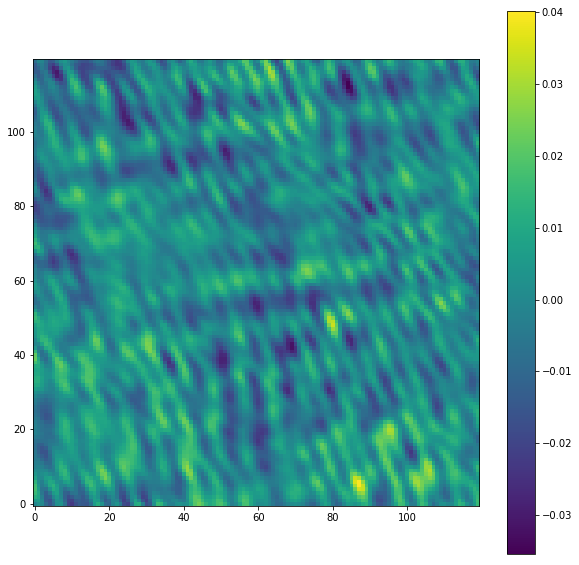

[u'/scratch/zmeyers/2019/HetDex/P210+52/eight/8sec_P210+52-t3821-image.fits']
5289
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 210.684416667  52.4194108333  
CRPIX : 1025.0  1025.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00125  0.00125  
NAXIS : 0  0
[120. 120.] pix
WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  'STOKES'  
CRVAL : 210.684416667  52.4194108333  143650817.871094  1.0  
CRPIX : 1025.0  1025.0  1.0  1.0  
PC1_1 PC1_2 PC1_3 PC1_4  : 1.0  0.0  0.0  0.0  
PC2_1 PC2_2 PC2_3 PC2_4  : 0.0  1.0  0.0  0.0  
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0  0.0  1.0  0.0  
PC4_1 PC4_2 PC4_3 PC4_4  : 0.0  0.0  0.0  1.0  
CDELT : -0.00125  0.00125  46875000.0  1.0  
NAXIS : 2048  2048  1  1


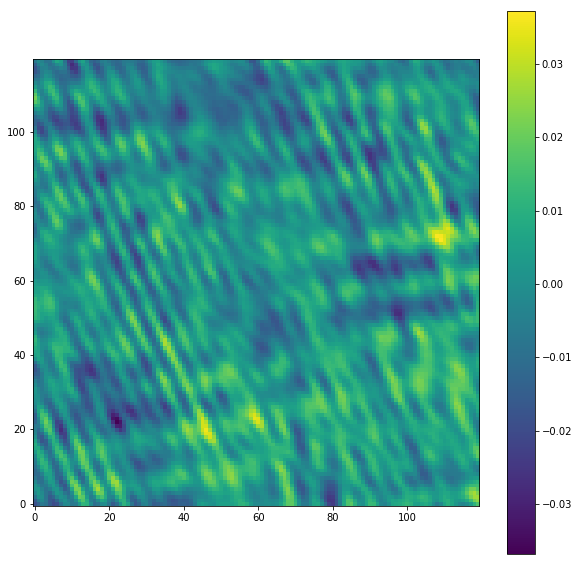

[u'/scratch/zmeyers/2019/HetDex/P210+52/eight/8sec_P210+52-t3821-image.fits']
5286
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 210.684416667  52.4194108333  
CRPIX : 1025.0  1025.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00125  0.00125  
NAXIS : 0  0
[120. 120.] pix
WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  'STOKES'  
CRVAL : 210.684416667  52.4194108333  143650817.871094  1.0  
CRPIX : 1025.0  1025.0  1.0  1.0  
PC1_1 PC1_2 PC1_3 PC1_4  : 1.0  0.0  0.0  0.0  
PC2_1 PC2_2 PC2_3 PC2_4  : 0.0  1.0  0.0  0.0  
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0  0.0  1.0  0.0  
PC4_1 PC4_2 PC4_3 PC4_4  : 0.0  0.0  0.0  1.0  
CDELT : -0.00125  0.00125  46875000.0  1.0  
NAXIS : 2048  2048  1  1


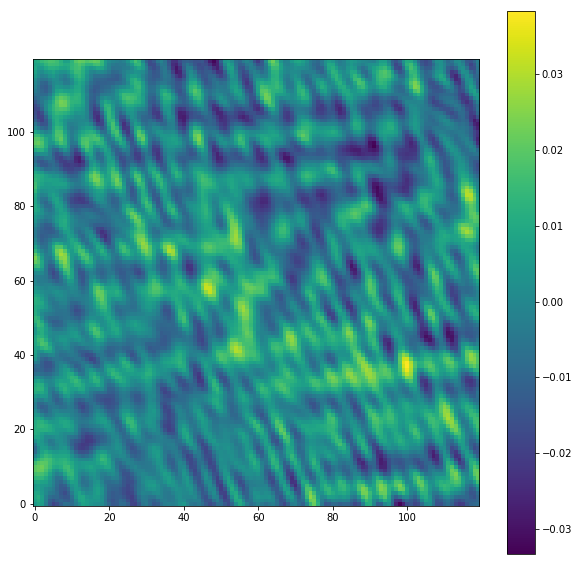

[u'/scratch/zmeyers/2019/HetDex/P210+52/eight/8sec_P210+52-t3821-image.fits']
5267
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 210.684416667  52.4194108333  
CRPIX : 1025.0  1025.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00125  0.00125  
NAXIS : 0  0
[120. 120.] pix
WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  'STOKES'  
CRVAL : 210.684416667  52.4194108333  143650817.871094  1.0  
CRPIX : 1025.0  1025.0  1.0  1.0  
PC1_1 PC1_2 PC1_3 PC1_4  : 1.0  0.0  0.0  0.0  
PC2_1 PC2_2 PC2_3 PC2_4  : 0.0  1.0  0.0  0.0  
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0  0.0  1.0  0.0  
PC4_1 PC4_2 PC4_3 PC4_4  : 0.0  0.0  0.0  1.0  
CDELT : -0.00125  0.00125  46875000.0  1.0  
NAXIS : 2048  2048  1  1


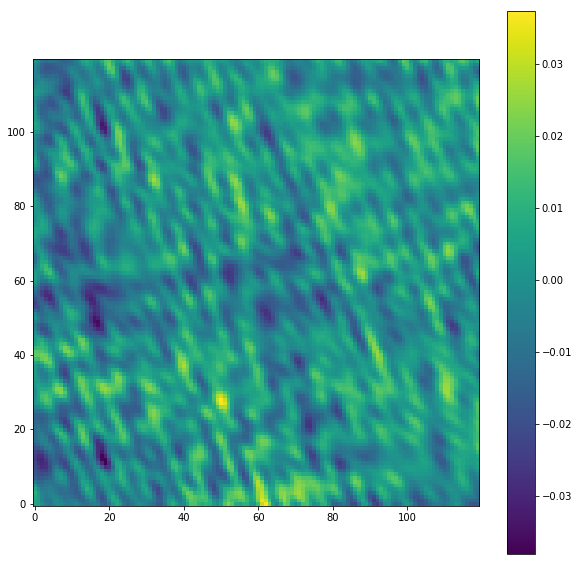

[u'/scratch/zmeyers/2019/HetDex/P210+52/eight/8sec_P210+52-t3821-image.fits']
5274
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 210.684416667  52.4194108333  
CRPIX : 1025.0  1025.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00125  0.00125  
NAXIS : 0  0
[120. 120.] pix
WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  'STOKES'  
CRVAL : 210.684416667  52.4194108333  143650817.871094  1.0  
CRPIX : 1025.0  1025.0  1.0  1.0  
PC1_1 PC1_2 PC1_3 PC1_4  : 1.0  0.0  0.0  0.0  
PC2_1 PC2_2 PC2_3 PC2_4  : 0.0  1.0  0.0  0.0  
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0  0.0  1.0  0.0  
PC4_1 PC4_2 PC4_3 PC4_4  : 0.0  0.0  0.0  1.0  
CDELT : -0.00125  0.00125  46875000.0  1.0  
NAXIS : 2048  2048  1  1


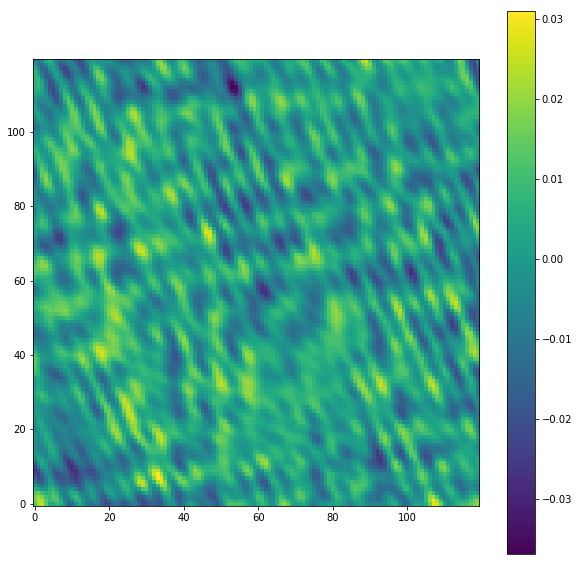

[u'/scratch/zmeyers/2019/HetDex/P210+52/eight/8sec_P210+52-t3821-image.fits']
5247
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 210.684416667  52.4194108333  
CRPIX : 1025.0  1025.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00125  0.00125  
NAXIS : 0  0
[120. 120.] pix
WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  'STOKES'  
CRVAL : 210.684416667  52.4194108333  143650817.871094  1.0  
CRPIX : 1025.0  1025.0  1.0  1.0  
PC1_1 PC1_2 PC1_3 PC1_4  : 1.0  0.0  0.0  0.0  
PC2_1 PC2_2 PC2_3 PC2_4  : 0.0  1.0  0.0  0.0  
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0  0.0  1.0  0.0  
PC4_1 PC4_2 PC4_3 PC4_4  : 0.0  0.0  0.0  1.0  
CDELT : -0.00125  0.00125  46875000.0  1.0  
NAXIS : 2048  2048  1  1


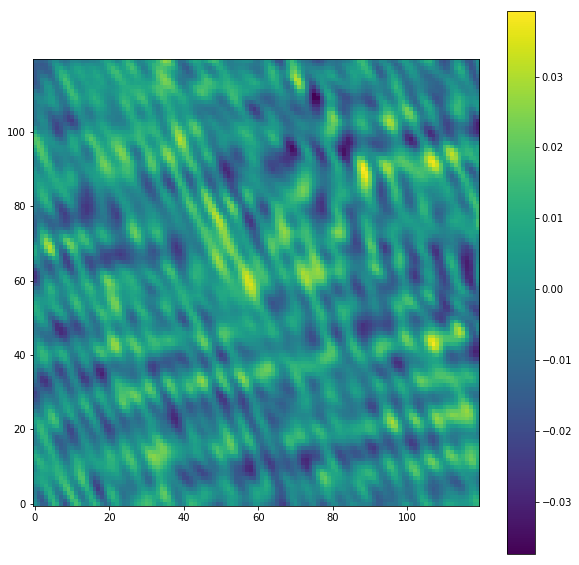

[u'/scratch/zmeyers/2019/HetDex/P210+52/eight/8sec_P210+52-t3821-image.fits']
5253
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 210.684416667  52.4194108333  
CRPIX : 1025.0  1025.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00125  0.00125  
NAXIS : 0  0
[120. 120.] pix
WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  'STOKES'  
CRVAL : 210.684416667  52.4194108333  143650817.871094  1.0  
CRPIX : 1025.0  1025.0  1.0  1.0  
PC1_1 PC1_2 PC1_3 PC1_4  : 1.0  0.0  0.0  0.0  
PC2_1 PC2_2 PC2_3 PC2_4  : 0.0  1.0  0.0  0.0  
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0  0.0  1.0  0.0  
PC4_1 PC4_2 PC4_3 PC4_4  : 0.0  0.0  0.0  1.0  
CDELT : -0.00125  0.00125  46875000.0  1.0  
NAXIS : 2048  2048  1  1


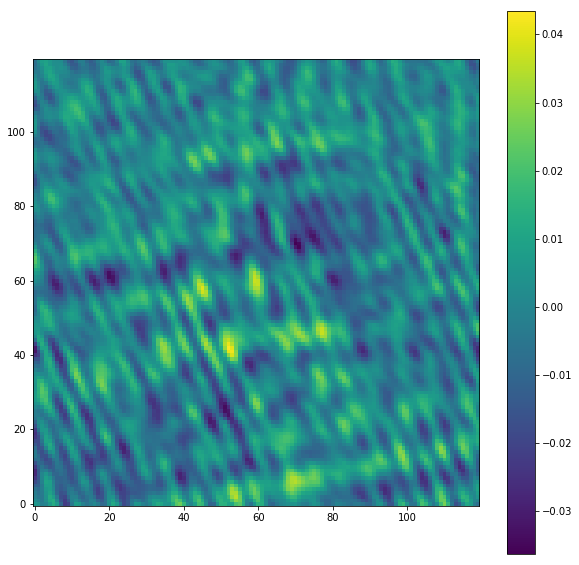

In [57]:
os.chdir(homedir)
os.chdir(newdir)
for i in PosVar.instances:
        if i.id == 4977:
            url = '/scratch/kmeulen/SourceSubstractedP23HetdexDir/Images/August/10min/10min_allband-t0040-image-pb.fits'
            ct.GetCutout(url,i.ra,i.dec,i.id)
        elif i.id == 4209:
            url = '/scratch/kmeulen/SourceSubstractedP23HetdexDir/Images/August/10min/10min_allband-t0025-image-pb.fits'
            
            ct.GetCutout(url,i.ra,i.dec,i.id)
        
        else:
            print i.url
            print i.id
            ct.GetCutout(i.url[0],i.ra,i.dec,i.id)

# 1min_allband_2048_8asec-t0193-image-pb.fits

# plot in Latex

In [ ]:
# print "\\begin{longtable}{m{1cm}|m{6cm}|m{6cm}|m{6cm}} \n\
# \\toprule \nId & Data & TGSS (deg)& VLSSR  \\\\\\midrule \n\\endfirsthead \n\\toprule \
# \nId & Data & TGSS (deg)& VLSSR   \\\\\\midrule \n\\endhead \n\\bottomrule \n\\endfoot \n\\bottomrule"

# # define caption for table
# print "\\caption{ Comparison position of candidates with different databases for the 1hr interval data} \n\\endlastfoot"

# for i in samesieslist:
#     a = "\\raisebox{-\\totalheight}{\\includegraphics[width=6cm, height=6cm]{"+technique+"/"+str(i[0])+"cutout_own.png}}"+" & "
#     if i[1] == "tgss":
#         b = ("\\raisebox{-\\totalheight}{\\includegraphics[width=6cm, height=6cm]{"+technique+"/"+str(i[0])+"cutout_tgss.png}}"+" & - \\\\")
#     if i[1] =="vlssr":
#         b = ("- & \\raisebox{-\\totalheight}{\\includegraphics[width=6cm, height=6cm]{"+technique+"/"+str(i[0])+"cutout_vlssr.png}} \\\\")
#     if i[1] == "tgss \\& vlssr":
#         b = ("\\raisebox{-\\totalheight}{\\includegraphics[width=6cm, height=6cm]{"+technique+"/"+str(i[0])+"cutout_tgss.png}}"+" "+ "&"\
#                 + " "+ "\\raisebox{-\\totalheight}{\\includegraphics[width=6cm, height=6cm]{"+technique+"/"+str(i[0])+"cutout_vlssr.png}} \\\\")
#     print latexHREF +str(i[0])+"}" + "{%i}" %i[0]+" "+ "&"+ " "+ a + b

# print "\\end{longtable}"


#  PRINT EVERYTHING IN LATEX IN ONE GO

In [60]:
folder = timescale+"_"+technique+"/"
##############################
# HERE WE PRINT THE NECESSARY PACKAGES
##############################
print"""
\documentclass{article}
\usepackage[utf8]{inputenc}
\usepackage[utf8]{inputenc}
\usepackage{geometry}
\usepackage{booktabs}
\usepackage{array}
\usepackage{graphicx}% delete the demo option in your actual code
\usepackage{longtable}
\usepackage{pdflscape}
\usepackage{mathabx}
\usepackage{float}
\usepackage{multirow}
\usepackage{multicol}
\usepackage{bigstrut}
\usepackage{caption}
\usepackage{subcaption}
\usepackage{siunitx}
\usepackage{makecell}
\usepackage{textcomp}
\usepackage{titlesec}
\usepackage[para]{footmisc}
\usepackage[nottoc]{tocbibind}
\usepackage{hyperref}
\geometry{lmargin=.5cm,bmargin=0.5cm,rmargin=1.5cm}
\hypersetup{
    colorlinks=true,
    linkcolor=blue,
    filecolor=magenta,      
    urlcolor=cyan,
}
\\begin{document}
"""
##########################
# HERE WE PRINT THE NUMBER TABLES OF POSITION VARIATING SOURCES
###########################
print "\\section{Flux variating Sources}\\label{possection:"+technique+":"+timescale+"}\n"
samesieslist = []
for i in range(len(FluxVar.instances)):
    samesie = False
    
#   create combined name if entry both in vlssr and tgss
    for j in range(len(samesieslist)):
        if PosVar.instances[i].id == samesieslist[j][0]:
            samesieslist[j][1] = samesieslist[j][1] + " \& " + PosVar.instances[i].database.name
            samesie = True
    if not samesie:
        samesieslist.append([PosVar.instances[i].id,PosVar.instances[i].database.name,PosVar.instances[i]])
    
samesieslist = sorted(samesieslist, key=itemgetter(1))

print "\\begin{longtable}{c|c|c|c|c} \n\
\\toprule \nDatabase & Ra (deg) & Dec (deg)& Fk5 & Id/Link \\\\\\midrule \n\\endfirsthead \n\\toprule \
\nDatabase & Ra (deg) & Dec (deg) & Fk5 &Id/Link  \\\\\\midrule \n\\endhead \n\\bottomrule \n\\endfoot \n\\bottomrule"

# define caption for table
print "\\caption{ Comparison position of candidates with TGSS and VLSSR for the " +timescale+" timescale data} \n\\endlastfoot\n\
\\label{"+technique+":"+timescale+":tablepos"+"}\n"

lastname = None
for i in samesieslist:
    if i[1] != lastname and lastname:
        print "\\hline"
    print i[1] +" "+ "&"+ " "+ '%0.3f' %i[2].ra + " " + "&"+ " "+ "%0.3f" %(i[2].dec) +\
    " " + "&" + " " +i[2].fk5 +" " + '&' + "  "+ latexHREF +str(i[0])+"}" + "{%i}" %i[0] +" \\" + "\\"
    
    lastname = i[1]

print "\\end{longtable}\n"


#########################
# HERE WE PRINT HE FIGURE TABLES
#####################
print "\\subsection{Images}"

print "\\begin{longtable}{m{1cm}|m{6cm}|m{6cm}|m{6cm}} \n\
\\toprule \nId & Data & TGSS (deg)& VLSSR  \\\\\\midrule \n\\endfirsthead \n\\toprule \
\nId & Data & TGSS (deg)& VLSSR   \\\\\\midrule \n\\endhead \n\\bottomrule \n\\endfoot \n\\bottomrule"

# define caption for table
print "\\caption{Images to compare the  position of our candidates with TGSS and VLSSR for the " +timescale+" timescale data} \n\\endlastfoot"
print "\\label{"+technique+":"+timescale+":tablepos_images"+"}"
for i in samesieslist:
    a = "\\raisebox{-\\totalheight}{\\includegraphics[width=6cm, height=6cm]{"+folder+str(i[0])+"cutout_own.png}}"+" & "
    if i[1] == "tgss":
        b = ("\\raisebox{-\\totalheight}{\\includegraphics[width=6cm, height=6cm]{"+folder+str(i[0])+"cutout_tgss.png}}"+" & - \\\\")
    if i[1] =="vlssr":
        b = ("- & \\raisebox{-\\totalheight}{\\includegraphics[width=6cm, height=6cm]{"+folder+str(i[0])+"cutout_vlssr.png}} \\\\")
    if i[1] == "tgss \\& vlssr":
        b = ("\\raisebox{-\\totalheight}{\\includegraphics[width=6cm, height=6cm]{"+folder+str(i[0])+"cutout_tgss.png}}"+" "+ "&"\
                + " "+ "\\raisebox{-\\totalheight}{\\includegraphics[width=6cm, height=6cm]{"+folder+str(i[0])+"cutout_vlssr.png}} \\\\")
    print latexHREF +str(i[0])+"}" + "{%i}" %i[0]+" "+ "&"+ " "+ a + b

print "\\end{longtable}\n"

##########################
# HERE WE PRINT THE NUMBER TABLES OF FLUX VARIATING SOURCES
###########################

print "\\begin{landscape}\n"
print "\\section{Fluxvariating Sources}\\label{varsection:"+technique+":"+timescale+"}\n"
# SEPERATE DATABASES
databaselist = ['tgss','vlssr']

samesieslist = []
for i in range(len(FluxVar.instances)):
    samesie = False
    tempdict = {'tgss':None,'vlssr':None,'id':None,'ra':None,'dec':None,'fk5':None}
    
#   create combined name if entry both in vlssr and tgss
    for j in range(len(samesieslist)):
        if FluxVar.instances[i].id == samesieslist[j]['id']:
#             samesieslist[j].append(FluxVar.instances[i])
            samesieslist[j][FluxVar.instances[i].database.name] = FluxVar.instances[i]
          
            samesie = True
    if not samesie:
        tempdict[FluxVar.instances[i].database.name] = FluxVar.instances[i]
        tempdict['id'] = FluxVar.instances[i].id
        tempdict['ra'] = FluxVar.instances[i].ra
        tempdict['dec'] = FluxVar.instances[i].dec
        tempdict['fk5'] = FluxVar.instances[i].fk5
        samesieslist.append(tempdict)


print "\\begin{longtable}{c|c|c|c|c|c|c|c|c|c|c|c} \n\
\\toprule \nFlux147.5MHz (Jy) & Tgss (Jy) & Flux74MHz (Jy)& Vlssr (Jy) & fk5 & Ra (deg) & Dec (deg) &tggsRa&tgssDec&\
vlssrRa&vlssrDec& Id/Link \\\\\\midrule \n\\endfirsthead \n\\toprule \
\nFlux147.5MHz (Jy) & Tgss (Jy) & Flux74MHz (Jy)& Vlssr (Jy)& fk5 & Ra (deg) & Dec (deg)  &tggsRa&tgssDec&\
vlssrRa&vlssrDec& Id/Link \\\\\\midrule \n\\endhead \n\\bottomrule \n\\endfoot \n\\bottomrule"

# define caption for table
print "\\caption{ Comparison of fluxes that vary from catalogues TGSS and VLSSR for " + timescale+" images"+"} \n\\endlastfoot"
print "\\label{"+technique+":"+timescale+":tablevar"+"}"
lastname = None
# samesieslist = sorted(samesieslist, key=lambda e: (e['ra'], e['dec']))
for i in samesieslist:
    a= ''
    b=''
    for j in(databaselist):
        try: 
            a+= str(np.around(i[j].pflux*i[j].scale,3)) + " " + "&"+ " "
        except:
            a += "-" +" "+ "&"+ " "
        try:
            a+= str(np.around(i[j].database.pflux[i[j].entry],3)) + " " + "&"+ " "   
        except:
            a += "-" +" "+ "&"+ " "
            
        try: 
            b+= '%0.3f' %(i[j].database.ra[i[j].entry])+" "+"&"+" "
            b+= '%0.3f' %(i[j].database.dec[i[j].entry])+" "+"&"+" "
        except:
            b+= "-" + " " + "&"+" " "-" + " " + "&"+" "
        
    a +=i['fk5'] + " " + '&' + "  "+ '%0.3f' %i['ra'] + " " + "&"+ " "+ "%0.3f" %i['dec'] \
    + " " + '&' + "  "+ b+ latexHREF +str(i["id"])+"}" + "{%i}" %i['id'] +"  \\" + "\\"
    print a

print "\\end{longtable}\n"
print "\\end{landscape}\n"

################
## HERE ARE THE PLOTS:
################
print "\\subsection{Fits}"

i = 0
try:
    while i < len(storedfitvalueslist):
        print "\
\\begin{figure}[H]\n\
    \\centering\n\
    \\begin{minipage}{.5\\textwidth}\n\
        \\centering\n\
        \\includegraphics[scale = 0.35]{"+folder+timescale+str(storedfitvalueslist[i][0])+".png}\n\
        \\captionsetup{labelformat=empty}\n\
        \\caption{Plot of source: "+latexHREF +str(storedfitvalueslist[i][0])+"}"+"{%i}" %storedfitvalueslist[i][0]\
    +",\\\\with a goodness of fit of: %0.2f and a dof of: %i"\
    %(storedfitvalueslist[i][1],storedfitvalueslist[i][2]) +"}\n\
        \\addtocounter{figure}{-1}\n\
        \\label{"+technique+":"+timescale+":"+str(storedfitvalueslist[i][0]) +":plot}\n\
    \\end{minipage}%\n\
    \\begin{minipage}{0.5\\textwidth}\n\
        \\centering\n"
        try:
            print"\
        \\includegraphics[scale = 0.35]{"+folder+timescale+str(storedfitvalueslist[i+1][0])+".png}\n\
        \\captionsetup{labelformat=empty}\n\
        \\caption{Plot of source: "+latexHREF +str(storedfitvalueslist[i+1][0])+"}"+"{%i}" %storedfitvalueslist[i+1][0]\
    +",\\\\with a goodness of fit of: "+str(storedfitvalueslist[i+1][1].round(2))+\
    " and a dof of: "+str(storedfitvalueslist[i+1][2])+""\
    +"}\n\
    \\addtocounter{figure}{-1}\n\
    \\label{"+technique+":"+timescale+":"+str(storedfitvalueslist[i+1][0]) +":plot}\n\
    \\end{minipage}\n\
\\end{figure}"
        except:
            print "--\n\
        \\end{minipage}\n\
\\end{figure}"
        if (i+2)%8==0 and i !=0:
            if i+2 ==8:
                pass
            else:
                print "\\newpage"
        i+=2
except:
    pass
########    
#JUST FOR ME:
#######
print "\\section{Effect on Candidate List}"
print "\
\\begin{table}[H]\n\
    \\centering\n\
    \\begin{tabular}{|c| c | c|}\n\
    \\toprule\n\
     Step & Candidate list before & Candidate list after\\\\\n\
    \\midrule\n\
        Initial Selector & "+str(initiallenghtcandi)+" & " + str(initialselector) +" \\\\\n\
        PosVarCandi & "+str(initialselector)+" & " + str(posvarcatasave) +" \\\\\n\
        FluxVarCandi & "+str(initialselector)+" & " + str(fluxvarcatasave) +"  \\\\\n\
        \\midrule\n\
    \\end{tabular}\n\
    \\caption{Effect of our script on the size of the candidate list for the "+timescale+" timescale images}\n\
    \\label{"+technique+":"+timescale+":"+"overviewcandidates}\n\
\\end{table}\n"

###############    
# ENDING THE DOCUMENT
##############
print "\\end{document}"


\documentclass{article}
\usepackage[utf8]{inputenc}
\usepackage[utf8]{inputenc}
\usepackage{geometry}
\usepackage{booktabs}
\usepackage{array}
\usepackage{graphicx}% delete the demo option in your actual code
\usepackage{longtable}
\usepackage{pdflscape}
\usepackage{mathabx}
\usepackage{float}
\usepackage{multirow}
\usepackage{multicol}
\usepackage{bigstrut}
\usepackage{caption}
\usepackage{subcaption}
\usepackage{siunitx}
\usepackage{makecell}
\usepackage{textcomp}
\usepackage{titlesec}
\usepackage[para]{footmisc}
\usepackage[nottoc]{tocbibind}
\usepackage{hyperref}
\geometry{lmargin=.5cm,bmargin=0.5cm,rmargin=1.5cm}
\hypersetup{
    colorlinks=true,
    linkcolor=blue,
    filecolor=magenta,      
    urlcolor=cyan,
}
\begin{document}

\section{Flux variating Sources}\label{possection:DDbatch2:P20_eight}

\begin{longtable}{c|c|c|c|c} 
\toprule 
Database & Ra (deg) & Dec (deg)& Fk5 & Id/Link \\\midrule 
\endfirsthead 
\toprule 
Database & Ra (deg) & Dec (deg) & Fk5 &Id/Link  \\\midru

Go to <a href=#bookmark>beginning</a>
Left off here <a name='bookmark2' />

# Plotting the fits

In [ ]:


# i = 0
# while i < len(storedfitvalueslist):
#     print "\
# \\begin{figure}[H]\n\
#     \\centering\n\
#     \\begin{minipage}{.5\\textwidth}\n\
#         \\centering\n\
#         \\includegraphics[scale = 0.35]{"+technique+"/"+timescale+str(storedfitvalueslist[i][0])+".png}\n\
#         \\captionsetup{labelformat=empty}\n\
#         \\caption{\\textbf{a:} Plot of "+latexHREF +str(storedfitvalueslist[i][0])+"}"+"{%i}" %storedfitvalueslist[i][0]\
#     +",\\\\with a goodness of fit of: %0.2f and a dof of: %i"\
#     %(storedfitvalueslist[i][1],storedfitvalueslist[i][2]) +"}\n\
#         \\addtocounter{figure}{-1}\n\
#         \\label{"+technique+":"+timescale+":"+str(storedfitvalueslist[i][0]) +":plot}\n\
#     \\end{minipage}%\n\
#     \\begin{minipage}{0.5\\textwidth}\n\
#         \\centering\n\
#         \\includegraphics[scale = 0.35]{"+technique+"/"+timescale+str(storedfitvalueslist[i][0])+".png}\n\
#         \\captionsetup{labelformat=empty}\n\
#         \\caption{\\textbf{b:} Plot of "+latexHREF +str(storedfitvalueslist[i+1][0])+"}"+"{%i}" %storedfitvalueslist[i+1][0]\
#     +",\\\\with a goodness of fit of: "+str(storedfitvalueslist[i+1][1].round(2))+\
#     " and a dof of: "+str(storedfitvalueslist[i+1][2])+""\
#     +"}\n\
#     \\addtocounter{figure}{-1}\n\
#     \\label{"+technique+":"+timescale+":"+str(storedfitvalueslist[i+1][0]) +":plot}\n\
#     \\end{minipage}\n\
# \\end{figure}"
#     if (i+2)%8==0 and i !=0:
#         if i+2 ==8:
#             pass
#         else:
#             print "\\newpage"
#     i+=2

# In case no sources

In [ ]:
print"""
\documentclass{article}
\usepackage[utf8]{inputenc}
\usepackage[utf8]{inputenc}
\usepackage{geometry}
\usepackage{booktabs}
\usepackage{array}
\usepackage{graphicx}% delete the demo option in your actual code
\usepackage{longtable}
\usepackage{pdflscape}
\usepackage{mathabx}
\usepackage{float}
\usepackage{multirow}
\usepackage{multicol}
\usepackage{bigstrut}
\usepackage{caption}
\usepackage{subcaption}
\usepackage{siunitx}
\usepackage{makecell}
\usepackage{textcomp}
\usepackage{titlesec}
\usepackage[para]{footmisc}
\usepackage[nottoc]{tocbibind}
\usepackage{hyperref}
\geometry{lmargin=.5cm,bmargin=0.5cm,rmargin=1.5cm}
\hypersetup{
    colorlinks=true,
    linkcolor=blue,
    filecolor=magenta,      
    urlcolor=cyan,
}
\\begin{document}
"""


print "\\section{Effect on Candidate List}"
print "\
\\begin{table}[H]\n\
    \\centering\n\
    \\begin{tabular}{|c| c | c|}\n\
    \\toprule\n\
     Step & Candidate list before & Candidate list after\\\\\n\
    \\midrule\n\
        Initial Selector & "+str(0)+" & " + str(0) +" \\\\\n\
        PosVarCandi & "+str(0)+" & " + str(0) +" \\\\\n\
        FluxVarCandi & "+str(0)+" & " + str(0) +"  \\\\\n\
        \\midrule\n\
    \\end{tabular}\n\
    \\caption{Effect of our script on the size of the candidate list for the "+timescale+" timescale images}\n\
    \\label{"+technique+":"+timescale+":"+"overviewcandidates}\n\
\\end{table}\n"


print "\\end{document}"